# Hyparameter Database
Tripti Santani(santani.t@husky.neu.edu),
Ashish Kumar(kumar.ashi@husky.neu.edu)

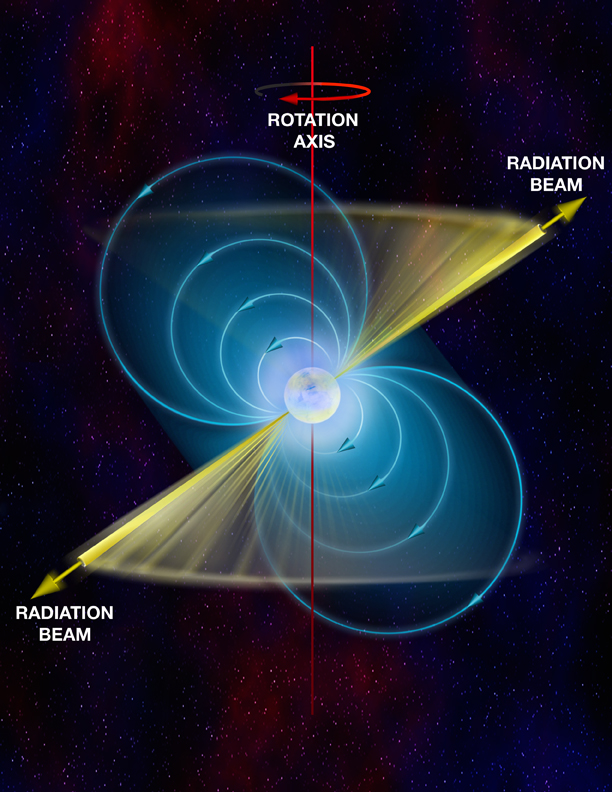

# Project Overview

## Introduction:

Every scientist and researcher want the best model for the task given the available resources. Effective hyperparameter search is the missing piece of the puzzle that will help us move towards this goal. The objective of the project is to create a hyperparameter database by running millions of hyperparameter values, over thousands of public datasets and calculating the individual conditional expectation of every hyperparameter on the quality of a model.  Objective is to choose a set of optimal hyperparameters for a learning algorithm.

## Dataset Description:

HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey .

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter .

As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes.

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation . Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.

Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted, which treat the candidate data sets as binary classification problems. Here the legitimate pulsar examples are a minority positive class, and spurious examples the majority negative class.

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators.

Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).

## Attribute Information:

Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

 - Mean of the integrated profile
 - Mean of the integrated profile.
 - Standard deviation of the integrated profile
 - Standard deviation of the integrated profile.
 - Excess kurtosis of the integrated profile
 - Excess kurtosis of the integrated profile.
 - Skewness of the integrated profile
 - Skewness of the integrated profile.
 - Mean of the DM-SNR curve
 - Mean of the DM-SNR curve.
 - Standard deviation of the DM-SNR curve
 - Standard deviation of the DM-SNR curve.
 - Excess kurtosis of the DM-SNR curve
 - Excess kurtosis of the DM-SNR curve.
 - Skewness of the DM-SNR curve
 - Skewness of the DM-SNR curve
 - target_class(class of pulsar star. 1 for pulsar star,0 for not a star)
 
HTRU 2 Summary 17,898 total examples. 1,639 positive examples. 16,259 negative examples.

Dataset Link: [Predicting a Pulsar start](https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star)

## Analysis of the data:

- Labels of target_class are: 1 for pulsar star,0 for not a star.
- There is no missing or null values in the dataset.


# Project Aim:

 - Get the leaderboard from AutoML and save all models on leaderboard in json files for all 5 run time 
 - Save metadata for each run time
 - Extract and save parameters of all models for every run time
 - Find the important hyperparameters for models
 - Find the range of hyperparameters for models
 - Compare the range of values across the models for different hyperparameters

# Acknowledgement:

This project work is part of ‘AI Skunkworks Project’.

Source: The dataset is taken from Kaggle collected by Pulsar candidates during the High Time Resolution Universe Survey.

# Project Implementation:

In [2]:
# Importing necessary libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model, metrics
from sklearn.preprocessing import PowerTransformer


from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression,LogisticRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, normalize, StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

import pylab as pl

# Importing H2O
import time, warnings, h2o, logging, os, sys, psutil, random
from h2o.automl import H2OAutoML


from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator
from h2o.grid.grid_search import H2OGridSearch
# from __future__ import print_function

import warnings
warnings.filterwarnings('ignore')

import json

# H2O

H2O is an open source predictive analytics platform for data scientists and business analysts who need scalable and fast machine learning.
Unlike traditional analytics tools, H2O provides a combination of extraordinary math and high performance parallel processing with unrivaled ease of use.
H2O intelligently combines the following features to solve today’s most challenging business problems:
 - Best of breed Open Source Technology
 - Easy-to-use WebUI and Familiar Interfaces
 - Data Agnostic Support for all Common Database and File Types
 - Massively scalable Big Data Munging and Analysis
 - Real-time Data Scoring

The H2O python module is not intended as a replacement for other popular machine learning frameworks such as scikit-learn, pylearn2, and their ilk, but is intended to bring H2O to a wider audience of data and machine learning devotees who work exclusively with Python.

H2O from Python is a tool for rapidly turning over models, doing data munging, and building applications in a fast, scalable environment without any of the mental anguish about parallelism and distribution of work.

In [3]:
# Initialising H2O
pct_memory=0.95
virtual_memory=psutil.virtual_memory()
print("Virtual Memory Size: ",virtual_memory)
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print("Minimum Memory Size: ",min_mem_size)

Virtual Memory Size:  svmem(total=12711006208, available=6628151296, percent=47.9, used=6082854912, free=6628151296)
Minimum Memory Size:  6


In [4]:
# Setting up initial metadata
data_path='../input//pulsar_stars.csv'
all_variables=None
test_path=None
target=None
nthreads=1 
min_mem_size= min_mem_size 
classification=False
scale=False
max_models=None    
model_path=None
balance_y=False 
balance_threshold=0.2
name=None 
server_path=None  
analysis=2

In [5]:
# Functions

def alphabet(n):
  alpha='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'    
  str=''
  r=len(alpha)-1   
  while len(str)<n:
    i=random.randint(0,r)
    str+=alpha[i]   
  return str
  
  
def set_meta_data(analysis,run_id,server,data,test,model_path,target,run_time,classification,scale,model,balance,balance_threshold,name,path,nthreads,min_mem_size):
  m_data={}
  m_data['start_time'] = time.time()
  m_data['target']=target
  m_data['server_path']=server
  m_data['data_path']=data 
  m_data['test_path']=test
  m_data['max_models']=model
  m_data['run_time']=run_time
  m_data['run_id'] =run_id
  m_data['scale']=scale
  m_data['classification']=classification
  m_data['scale']=False
  m_data['model_path']=model_path
  m_data['balance']=balance
  m_data['balance_threshold']=balance_threshold
  m_data['project'] =name
  m_data['end_time'] = time.time()
  m_data['execution_time'] = 0.0
  m_data['run_path'] =path
  m_data['nthreads'] = nthreads
  m_data['min_mem_size'] = min_mem_size
  m_data['analysis'] = analysis
  if (analysis==1):
     m_data['Main_Eval_metrix'] = "RMSE"
  else:
     m_data['Main_Eval_metrix'] = "Logloss"
  return m_data


def dict_to_json(dct,n):
  j = json.dumps(dct, indent=4)
  f = open(n, 'w')
  print(j, file=f)
  f.close()
  
  
def stackedensemble(mod):
    coef_norm=None
    try:
      metalearner = h2o.get_model(mod.metalearner()['name'])
      coef_norm=metalearner.coef_norm()
    except:
      pass        
    return coef_norm

def stackedensemble_df(df):
    bm_algo={ 'GBM': None,'GLM': None,'DRF': None,'XRT': None,'Dee': None}
    for index, row in df.iterrows():
      if len(row['model_id'])>3:
        key=row['model_id'][0:3]
        if key in bm_algo:
          if bm_algo[key] is None:
                bm_algo[key]=row['model_id']
    bm=list(bm_algo.values()) 
    bm=list(filter(None.__ne__, bm))             
    return bm

def se_stats(modl):
    d={}
    d['algo']=modl.algo
    d['model_id']=modl.model_id   
    d['auc']=modl.auc()   
    d['roc']=modl.roc()
    d['mse']=modl.mse()   
    d['null_degrees_of_freedom']=modl.null_degrees_of_freedom()
    d['null_deviance']=modl.null_deviance()
    d['residual_degrees_of_freedom']=modl.residual_degrees_of_freedom()   
    d['residual_deviance']=modl.residual_deviance()
    d['rmse']=modl.rmse()
    return d

def get_model_by_algo(algo,models_dict):
    mod=None
    mod_id=None    
    for m in list(models_dict.keys()):
        if m[0:3]==algo:
            mod_id=m
            mod=h2o.get_model(m)      
    return mod,mod_id     
    
    
def gbm_stats(modl):
    d={}
    d['algo']=modl.algo
    d['model_id']=modl.model_id   
    d['varimp']=modl.varimp()  
    return d
    
    
def dl_stats(modl):
    d={}
    d['algo']=modl.algo
    d['model_id']=modl.model_id   
    d['varimp']=modl.varimp()  
    return d
    
    
def drf_stats(modl):
    d={}
    d['algo']=modl.algo
    d['model_id']=modl.model_id   
    d['varimp']=modl.varimp()  
    d['roc']=modl.roc()      
    return d
    
def xrt_stats(modl):
    d={}
    d['algo']=modl.algo
    d['model_id']=modl.model_id   
    d['varimp']=modl.varimp()  
    d['roc']=modl.roc()      
    return d
    
    
def glm_stats(modl):
    d={}
    d['algo']=modl.algo
    d['model_id']=modl.model_id   
    d['coef']=modl.coef()  
    d['coef_norm']=modl.coef_norm()      
    return d
    
def model_performance_stats(perf):
    d={}
    try:    
      d['mse']=perf.mse()
    except:
      pass      
    try:    
      d['rmse']=perf.rmse() 
    except:
      pass      
    try:    
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_deviance']=perf.residual_deviance() 
    except:
      pass      
    try:    
      d['null_deviance']=perf.null_deviance() 
    except:
      pass      
    try:    
      d['aic']=perf.aic() 
    except:
      pass      
    try:
      d['logloss']=perf.logloss() 
    except:
      pass    
    try:
      d['auc']=perf.auc()
    except:
      pass  
    try:
      d['gini']=perf.gini()
    except:
      pass    
    return d
    
def impute_missing_values(df, x, scal=False):
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in x:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    _ = df[reals].impute(method='mean')
    _ = df[ints].impute(method='median')
    if scal:
        df[reals] = df[reals].scale()
        df[ints] = df[ints].scale()    
    return


def get_independent_variables(df, targ):
    C = [name for name in df.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x=ints+enums+reals
    return x
    
def get_all_variables_csv(i):
    ivd={}
    try:
      iv = pd.read_csv(i,header=None)
    except:
      sys.exit(1)    
    col=iv.values.tolist()[0]
    dt=iv.values.tolist()[1]
    i=0
    for c in col:
      ivd[c.strip()]=dt[i].strip()
      i+=1        
    return ivd
    
    

def check_all_variables(df,dct,y=None):     
    targ=list(dct.keys())     
    for key, val in df.types.items():
        if key in targ:
          if dct[key] not in ['real','int','enum']:                      
            targ.remove(key)  
    for key, val in df.types.items():
        if key in targ:            
          if dct[key] != val:
            print('convert ',key,' ',dct[key],' ',val)
            if dct[key]=='enum':
                try:
                  df[key] = df[key].asfactor() 
                except:
                  targ.remove(key)                 
            if dct[key]=='int': 
                try:                
                  df[key] = df[key].asnumeric() 
                except:
                  targ.remove(key)                  
            if dct[key]=='real':
                try:                
                  df[key] = df[key].asnumeric()  
                except:
                  targ.remove(key)                  
    if y is None:
      y=df.columns[-1] 
    if y in targ:
      targ.remove(y)
    else:
      y=targ.pop()            
    return targ    
    
def predictions(mod,data,run_id):
    test = h2o.import_file(data)
    mod_perf=mod_best.model_performance(test)
              
    stats_test={}
    stats_test=model_performance_stats(mod_perf)

    n=run_id+'_test_stats.json'
    dict_to_json(stats_test,n) 

    try:    
      cf=mod_perf.confusion_matrix(metrics=["f1","f2","f0point5","accuracy","precision","recall","specificity","absolute_mcc","min_per_class_accuracy","mean_per_class_accuracy"])
      cf_df=cf[0].table.as_data_frame()
      cf_df.to_csv(run_id+'_test_confusion_matrix.csv')
    except:
      pass

    predictions = mod_best.predict(test)
    predictions_df=test.cbind(predictions).as_data_frame() 
    predictions_df.to_csv(run_id+'_predictions.csv')
    return

def predictions_test(mod,test,run_id):
    mod_perf=mod_best.model_performance(test)          
    stats_test={}
    stats_test=model_performance_stats(mod_perf)
    n=run_id+'_test_stats.json'
    dict_to_json(stats_test,n) 
    try:
      cf=mod_perf.confusion_matrix()
#      cf=mod_perf.confusion_matrix(metrics=["f1","f2","f0point5","accuracy","precision","recall","specificity","absolute_mcc","min_per_class_accuracy","mean_per_class_accuracy"])
      cf_df=cf.table.as_data_frame()
      cf_df.to_csv(run_id+'_test_confusion_matrix.csv')
    except:
      pass
    predictions = mod_best.predict(test)    
    predictions_df=test.cbind(predictions).as_data_frame() 
    predictions_df.to_csv(run_id+'_predictions.csv')
    return predictions

def check_X(x,df):
    for name in x:
        if name not in df.columns:
          x.remove(name)  
    return x    
    
    
def get_stacked_ensemble(lst):
    se=None
    for model in model_set:
      if 'BestOfFamily' in model:
        se=model
    if se is None:     
      for model in model_set:
        if 'AllModels'in model:
          se=model           
    return se       
    
def get_variables_types(df):
    d={}
    for key, val in df.types.items():
        d[key]=val           
    return d    

def Variable_imp_list(modl):
    d={}
    d['algo']=modl.algo
    d['model_id']=modl.model_id   
    d['varimp']=modl.varimp()  
    return d

#  End Functions

In [6]:
all_variables=None

In [7]:
def Get_Hyperparameters(df_pandaFrame):
    
    GBM_list=['Model_name','Leaderboard_rank','learn_rate','learn_rate_annealing','max_abs_leafnode_pred','pred_noise_bandwidth','distribution','tweedie_power','quantile_alpha','huber_alpha','categorical_encoding','max_depth','sample_rate','col_sample_rate','ntrees','nfolds']
    df_gbm = pd.DataFrame(columns=GBM_list)


    GLM_list=['Model_name','Leaderboard_rank','nfolds','seed','tweedie_variance_power','tweedie_link_power','alpha','lambda','missing_values_handling','standardize']
    df_glm = pd.DataFrame(columns=GLM_list)

    # DRF and XRT are the same
    DRF_list=['Model_name','Leaderboard_rank','nfolds','seed','mtries','categorical_encoding']
    df_drf = pd.DataFrame(columns=DRF_list)

    Deeplearn_list=['Model_name','Leaderboard_rank','balance_classes','categorical_encoding','class_sampling_factors','distribution','huber_alpha','max_after_balance_size','max_runtime_secs','missing_values_handling','model_id','quantile_alpha','seed','standardize','stopping_metric','stopping_rounds','stopping_tolerance','tweedie_power']
    df_Deeplearn = pd.DataFrame(columns=Deeplearn_list)

    count=0
    cnt=0
    
    rows_list = []
    for rows in df_pandaFrame.iterrows():

        mod_best1=h2o.get_model(model_set[count])
        count=count+1
        hy_parameter = mod_best1.params

        if (mod_best1.algo == 'gbm' ):
            df_gbm=df_gbm.append({'Model_name':mod_best1.model_id,
                                    'Leaderboard_rank':count,
                                    'Logloss':mod_best1.logloss(xval=True),
                                    'learn_rate':hy_parameter['learn_rate']['actual'],
                                    'balance_classes' :hy_parameter['balance_classes']['actual'],
                                    'max_depth':hy_parameter['max_depth']['actual'],
                                    'min_rows' :hy_parameter['min_rows']['actual'],
                                    'class_sampling_factors' :hy_parameter['class_sampling_factors']['actual'],
                                    'stopping_tolerance' :hy_parameter['stopping_tolerance']['actual'],
                                    'sample_rate': hy_parameter['sample_rate']['actual'],
                                    'stopping_metric' :hy_parameter['stopping_metric']['actual'],
                                    'stopping_rounds' :hy_parameter['stopping_rounds']['actual'],
                                    'sample_rate_per_class' :hy_parameter['sample_rate_per_class']['actual'],
                                    'col_sample_rate':hy_parameter['col_sample_rate']['actual'],
                                    'max_runtime_secs' :hy_parameter['max_runtime_secs']['actual'],
                                    'col_sample_rate_change_per_level' :hy_parameter['col_sample_rate_change_per_level']['actual'],
                                    'col_sample_rate_per_tree' :hy_parameter['col_sample_rate_per_tree']['actual'],
                                    'min_split_improvement' :hy_parameter['min_split_improvement']['actual'],
                                    'model_id' :hy_parameter['model_id']['actual'],
                                    'seed' :hy_parameter['seed']['actual'],
                                    'nbins' :hy_parameter['nbins']['actual'],
                                    'nbins_cats' :hy_parameter['nbins_cats']['actual'],
                                    'nbins_top_level' :hy_parameter['nbins_top_level']['actual'],
                                    'histogram_type' :hy_parameter['histogram_type']['actual'],
                                    'max_after_balance_size' :hy_parameter['max_after_balance_size']['actual'],
                                    'ntrees':hy_parameter['ntrees']['actual'],
                                    'learn_rate_annealing' :hy_parameter['learn_rate_annealing']['actual'],
                                    'max_abs_leafnode_pred' :hy_parameter['max_abs_leafnode_pred']['actual'],
                                    'pred_noise_bandwidth' :hy_parameter['pred_noise_bandwidth']['actual'],
                                    'tweedie_power' :hy_parameter['tweedie_power']['actual'],
                                    'quantile_alpha':hy_parameter['quantile_alpha']['actual'],
                                    'huber_alpha':hy_parameter['huber_alpha']['actual'],
                                    'categorical_encoding':hy_parameter['categorical_encoding']['actual']},
                                 ignore_index=True)

        elif (mod_best1.algo == 'glm'):
            df_glm=df_glm.append({'Model_name':mod_best1.model_id,
                                    'Leaderboard_rank':count,
                                    'Logloss':mod_best1.logloss(xval=True),
                                    'alpha': hy_parameter['alpha']['actual'],
                                    'balance_classes' : hy_parameter['balance_classes']['actual'],
                                    'lambda' : hy_parameter['lambda']['actual'],
                                    'max_runtime_secs' :hy_parameter['max_runtime_secs']['actual'],
                                    'missing_values_handling' :hy_parameter['missing_values_handling']['actual'],
                                    'model_id' :hy_parameter['model_id']['actual'],
                                    'seed' :hy_parameter['seed']['actual'],
                                    'standardize' :hy_parameter['standardize']['actual'],
                                    'tweedie_link_power' :hy_parameter['tweedie_link_power']['actual'],
                                    'tweedie_variance_power' :hy_parameter['tweedie_variance_power']['actual'],
                                    'max_after_balance_size' :hy_parameter['max_after_balance_size']['actual'],
                                    'max_iterations' :hy_parameter['max_iterations']['actual']},
                                 ignore_index=True)

        elif (mod_best1.algo == 'drf'):
            df_drf=df_drf.append({'Model_name':mod_best1.model_id,
                                    'Leaderboard_rank':count,
                                    'Logloss':mod_best1.logloss(xval=True),
                                    'balance_classes' : hy_parameter['balance_classes']['actual'],
                                    'seed':hy_parameter['seed']['actual'],
                                    'mtries':hy_parameter['mtries']['actual'],
                                    'class_sampling_factors' :hy_parameter['class_sampling_factors']['actual'],
                                    'col_sample_rate_change_per_level' :hy_parameter['col_sample_rate_change_per_level']['actual'],
                                    'col_sample_rate_per_tree' :hy_parameter['col_sample_rate_per_tree']['actual'],
                                    'histogram_type' :hy_parameter['histogram_type']['actual'],
                                    'max_after_balance_size' :hy_parameter['max_after_balance_size']['actual'],
                                    'max_depth':hy_parameter['max_depth']['actual'],
                                    'max_runtime_secs' :hy_parameter['max_runtime_secs']['actual'],
                                    'min_rows' :hy_parameter['min_rows']['actual'],
                                    'min_split_improvement' :hy_parameter['min_split_improvement']['actual'],
                                    'model_id' :hy_parameter['model_id']['actual'],
                                    'nbins' :hy_parameter['nbins']['actual'],
                                    'nbins_cats' :hy_parameter['nbins_cats']['actual'],
                                    'nbins_top_level' :hy_parameter['nbins_top_level']['actual'],
                                    'ntrees':hy_parameter['ntrees']['actual'],
                                    'sample_rate': hy_parameter['sample_rate']['actual'],
                                    'stopping_metric' :hy_parameter['stopping_metric']['actual'],
                                    'sample_rate_per_class' :hy_parameter['sample_rate_per_class']['actual'],
                                    'seed' :hy_parameter['seed']['actual'],
                                    'stopping_metric' :hy_parameter['stopping_metric']['actual'],
                                    'stopping_rounds' :hy_parameter['stopping_rounds']['actual'],
                                    'categorical_encoding':hy_parameter['categorical_encoding']['actual']},
                                 ignore_index=True)

        elif (mod_best1.algo == 'deeplearning'):
            df_Deeplearn=df_Deeplearn.append({'Model_name':mod_best1.model_id,
                                    'Leaderboard_rank':count,
                                    'Logloss':mod_best1.logloss(xval=True),
                                    'balance_classes': hy_parameter['balance_classes']['actual'],
                                    'max_after_balance_size': hy_parameter['max_after_balance_size']['actual'],
                                    'class_sampling_factors':hy_parameter['class_sampling_factors']['actual'],
                                    'activation':hy_parameter['activation']['actual'],
                                    'hidden':hy_parameter['hidden']['actual'],
                                    'epochs':hy_parameter['epochs']['actual'],
                                    'train_samples_per_iteration':hy_parameter['train_samples_per_iteration']['actual'],
                                    'target_ratio_comm_to_comp':hy_parameter['target_ratio_comm_to_comp']['actual'],
                                    'seed':hy_parameter['seed']['actual'],
                                    'adaptive_rate':hy_parameter['adaptive_rate']['actual'],
                                    'rho':hy_parameter['rho']['actual'],
                                    'epsilon':hy_parameter['epsilon']['actual'],
                                    'rate':hy_parameter['rate']['actual'],
                                    'rate_annealing':hy_parameter['rate_annealing']['actual'],
                                    'rate_decay':hy_parameter['rate_decay']['actual'],
                                    'momentum_start':hy_parameter['momentum_start']['actual'],
                                    'momentum_ramp':hy_parameter['momentum_ramp']['actual'],
                                    'momentum_stable':hy_parameter['momentum_stable']['actual'],                                          
                                    'nesterov_accelerated_gradient':hy_parameter['nesterov_accelerated_gradient']['actual'],
                                    'input_dropout_ratio':hy_parameter['input_dropout_ratio']['actual'],
                                    'hidden_dropout_ratios':hy_parameter['hidden_dropout_ratios']['actual'],
                                    'l1':hy_parameter['l1']['actual'],
                                    'initial_weight_distribution':hy_parameter['initial_weight_distribution']['actual'],
                                    'initial_weight_scale':hy_parameter['initial_weight_scale']['actual'],                                          
                                    'l2':hy_parameter['l2']['actual'],
                                    'max_w2':hy_parameter['max_w2']['actual'],
                                    'loss':hy_parameter['loss']['actual'],
                                    'initial_weights':hy_parameter['initial_weights']['actual'],
                                    'initial_biases':hy_parameter['initial_biases']['actual'],
                                    'distribution':hy_parameter['distribution']['actual'],                                          
                                    'tweedie_power':hy_parameter['tweedie_power']['actual'],
                                    'quantile_alpha':hy_parameter['quantile_alpha']['actual'],
                                    'score_interval':hy_parameter['score_interval']['actual'],
                                    'score_training_samples':hy_parameter['score_training_samples']['actual'],
                                    'score_validation_samples':hy_parameter['score_validation_samples']['actual'],
                                    'score_duty_cycle':hy_parameter['score_duty_cycle']['actual'],
                                    'classification_stop':hy_parameter['classification_stop']['actual'],
                                    'regression_stop':hy_parameter['regression_stop']['actual'],
                                    'score_validation_sampling':hy_parameter['score_validation_sampling']['actual'],                                          
                                    'overwrite_with_best_model':hy_parameter['overwrite_with_best_model']['actual'],
                                    'use_all_factor_levels':hy_parameter['use_all_factor_levels']['actual'],
                                    'standardize':hy_parameter['standardize']['actual'],
                                    'fast_mode':hy_parameter['fast_mode']['actual'],
                                    'variable_importances':hy_parameter['variable_importances']['actual'],                                          
                                    'fast_mode':hy_parameter['fast_mode']['actual'],
                                    'force_load_balance':hy_parameter['force_load_balance']['actual'],
                                    'replicate_training_data':hy_parameter['replicate_training_data']['actual'],
                                    'shuffle_training_data':hy_parameter['shuffle_training_data']['actual'],
                                    'missing_values_handling':hy_parameter['missing_values_handling']['actual'],
                                    'sparse':hy_parameter['sparse']['actual'],
                                    'col_major':hy_parameter['col_major']['actual'],
                                    'average_activation':hy_parameter['average_activation']['actual'],
                                    'sparsity_beta':hy_parameter['sparsity_beta']['actual'],                                          
                                    'max_categorical_features':hy_parameter['max_categorical_features']['actual'],
                                    'reproducible':hy_parameter['reproducible']['actual'],
                                    'elastic_averaging':hy_parameter['elastic_averaging']['actual'],
                                    'elastic_averaging_moving_rate':hy_parameter['elastic_averaging_moving_rate']['actual'],
                                    'elastic_averaging_regularization':hy_parameter['elastic_averaging_regularization']['actual'],
                                    'categorical_encoding':hy_parameter['categorical_encoding']['actual']

                                             },
                                 ignore_index=True)

    return df_gbm,df_glm,df_drf,df_Deeplearn

In [8]:
# Function to determine range of hyperparameters
def get_rang(dataFrame):
    df_Range=pd.DataFrame(columns=['Hyperparameter_name','Min_value','Max_value'])
    for columns in dataFrame:
        if(columns!= 'Model_name' and columns!='Leaderboard_rank' and columns!='RMSE_Val'):
            df_Range=df_Range.append({'Hyperparameter_name':columns,
                                        'Min_value':dataFrame[columns].min(),
                                        'Max_value':dataFrame[columns].max()
                                        },
                                     ignore_index=True)
        
    return df_Range

In [9]:
# Connect to a cluster
port_no=random.randint(5555,55555)

try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:36520..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.191-b12, mixed mode)
  Starting server from C:\Users\Tripti Santani\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\TRIPTI~1\AppData\Local\Temp\tmpmpos2vdc
  JVM stdout: C:\Users\TRIPTI~1\AppData\Local\Temp\tmpmpos2vdc\h2o_Tripti_Santani_started_from_python.out
  JVM stderr: C:\Users\TRIPTI~1\AppData\Local\Temp\tmpmpos2vdc\h2o_Tripti_Santani_started_from_python.err
  Server is running at http://127.0.0.1:36520
Connecting to H2O server at http://127.0.0.1:36520... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.6
H2O cluster version age:,1 month and 12 days
H2O cluster name:,H2O_from_python_Tripti_Santani_b6180v
H2O cluster total nodes:,1
H2O cluster free memory:,5.750 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [10]:
# Importing dataset into H2O dataframe
H2O_df = h2o.import_file(data_path)
H2O_df.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
140.562,55.6838,-0.234571,-0.699648,3.19983,19.1104,7.97553,74.2422,0
102.508,58.8824,0.465318,-0.515088,1.67726,14.8601,10.5765,127.394,0
103.016,39.3416,0.323328,1.05116,3.12124,21.7447,7.73582,63.1719,0
136.75,57.1784,-0.0684146,-0.636238,3.64298,20.9593,6.8965,53.5937,0
88.7266,40.6722,0.600866,1.12349,1.17893,11.4687,14.2696,252.567,0
93.5703,46.6981,0.531905,0.416721,1.63629,14.5451,10.6217,131.394,0
119.484,48.7651,0.0314602,-0.112168,0.999164,9.27961,19.2062,479.757,0
130.383,39.8441,-0.158323,0.38954,1.22074,14.3789,13.5395,198.236,0
107.25,52.6271,0.452688,0.170347,2.33194,14.4869,9.001,107.973,0
107.258,39.4965,0.465882,1.16288,4.07943,24.9804,7.39708,57.7847,0


In [11]:
H2O_df.describe()

Rows:17898
Cols:9




,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
type,real,real,real,real,real,real,real,real,int
mins,5.8125,24.77204176,-1.876011181,-1.791885981,0.213210702,7.370432165,-3.139269611,-1.976975603,0.0
mean,111.07996834492681,46.54953156153425,0.47785725810191076,1.770278998071349,12.614399658311543,26.326514703918594,8.303556116638283,104.85770870366203,0.09157447759526204
maxs,192.6171875,98.77891067,8.069522046,68.10162173,223.3921405,110.6422106,34.53984419,1191.000837,1.0
sigma,25.652935359860113,6.843189410087772,1.0640397163731556,6.167913247731735,29.472897150065172,19.470572330539166,4.506091858992771,106.51453953467566,0.2884323852046664
zeros,0,0,0,0,0,0,0,0,16259
missing,0,0,0,0,0,0,0,0,0
0,140.5625,55.68378214,-0.234571412,-0.699648398,3.199832776,19.11042633,7.975531794,74.24222492,0.0
1,102.5078125,58.88243001,0.465318154,-0.515087909,1.677257525,14.86014572,10.57648674,127.3935796,0.0
2,103.015625,39.34164944,0.323328365,1.051164429,3.121237458,21.74466875,7.735822015,63.17190911,0.0


# 1. H2O Implementation for runtime 333

In [12]:
# Initializing the server path
run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_dir)
os.chdir(run_dir)    

# run_id to std out
print (run_id)

LvHf04lzP


In [13]:
#Creating zip file for the particular Run_ID
logfile=run_id+'_autoh2o_log.zip'
logs_path=os.path.join(run_dir,'logs')
print(logs_path,logfile)

C:\Users\Tripti Santani\Desktop\Hyperparameter\LvHf04lzP\logs LvHf04lzP_autoh2o_log.zip


In [14]:
run_time=333

In [15]:
if analysis == 1:
 classification=False
elif analysis == 2:
 classification=True

In [16]:
# meta data
meta_data = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)

{'start_time': 1556262261.8366945, 'target': None, 'server_path': 'C:\\Users\\Tripti Santani\\Desktop\\Hyperparameter', 'data_path': 'C:/Users/Tripti Santani/Downloads/pulsar_stars.csv', 'test_path': None, 'max_models': None, 'run_time': 333, 'run_id': 'LvHf04lzP', 'scale': False, 'classification': True, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1556262261.8366945, 'execution_time': 0.0, 'run_path': 'C:\\Users\\Tripti Santani\\Desktop\\Hyperparameter\\LvHf04lzP', 'nthreads': 1, 'min_mem_size': 6, 'analysis': 2, 'Main_Eval_metrix': 'Logloss'}


In [17]:
# dependent variable
# assign target and inputs for classification or regression
if target==None:
  target=H2O_df.columns[8]   
y = target

In [18]:
if all_variables is not None:
 ivd=get_all_variables_csv(all_variables)
 print(ivd)
 X=check_all_variables(H2O_df,ivd,y)
 print(X)

In [19]:
# independent variables

X = []
if all_variables is None:
 X=get_independent_variables(H2O_df, y)
 print(X)
else:
 ivd=get_all_variables_csv(all_variables)
 X=check_all_variables(H2O_df, ivd)


X=check_X(X,H2O_df)

# Add independent variables
meta_data['X']=X


# impute missing values
_=impute_missing_values(H2O_df,X, scale)

['Mean of the integrated profile', 'Standard deviation of the integrated profile', 'Excess kurtosis of the integrated profile', 'Skewness of the integrated profile', 'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve', 'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve']


In [20]:
# Force target to be factors
# Only 'int' or 'string' are allowed for asfactor(), got Target (Total orders):real 

if classification:
    H2O_df[y] = H2O_df[y].asfactor()

In [21]:
def check_y(y,H2O_df):
  ok=False
  C = [name for name in H2O_df.columns if name == y]
  for key, val in H2O_df.types.items():
    if key in C:
      if val in ['real','int','enum']:        
        ok=True         
  return ok

In [22]:
ok=check_y(y,H2O_df)
if not ok:
    print(ok)

In [23]:
# To find levels in the classification 
if classification:
   print(H2O_df[y].levels())

[['0', '1']]


In [24]:
allV=get_variables_types(H2O_df)
meta_data['variables']=allV

In [25]:
model_start_time = time.time()

# AutoML: Automatic Machine Learning

H2O's AutoML is used for automating the machine learning workflow, which includes automatic training and tuning of many models within a user-specified time-limit which in this python is the run_time. 

In [26]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time)

In [27]:
aml.train(x = X, y = y, training_frame = H2O_df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [28]:
meta_data['model_execution_time'] = time.time() - model_start_time

In [29]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,mean_per_class_error,rmse,mse
GBM_grid_1_AutoML_20190426_030430_model_2,0.977941,0.0709759,0.0667278,0.129205,0.0166939
GBM_2_AutoML_20190426_030430,0.977837,0.0705334,0.0726397,0.129347,0.0167307
GBM_1_AutoML_20190426_030430,0.977063,0.0746716,0.072342,0.13408,0.0179774
GBM_4_AutoML_20190426_030430,0.976913,0.0722167,0.0759904,0.12988,0.0168689
GBM_3_AutoML_20190426_030430,0.97685,0.0707464,0.0692557,0.129132,0.0166751
GBM_5_AutoML_20190426_030430,0.97669,0.0692631,0.0675483,0.127648,0.0162941
DeepLearning_grid_1_AutoML_20190426_030430_model_2,0.976112,0.0782621,0.0700245,0.134206,0.0180113
GLM_grid_1_AutoML_20190426_030430_model_1,0.976087,0.0737488,0.0765981,0.131839,0.0173815
GBM_grid_1_AutoML_20190426_030430_model_4,0.97563,0.0791005,0.0828581,0.135263,0.018296
GBM_grid_1_AutoML_20190426_030430_model_3,0.975064,0.0742599,0.078677,0.132012,0.0174271


In [30]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best=h2o.get_model(model_set[0])
meta_data['mod_best']= h2o.get_model(model_set[0])._id 
meta_data['mod_best_algo']=h2o.get_model(model_set[0]).algo

In [31]:
meta_data['mod_best_algo']

'gbm'

In [32]:
#Getting leaderboard in json format
df_pandaFrame = lb.as_data_frame()
leaderboard_stats=run_id+'_leaderboard.json'
df_pandaFrame.to_json(leaderboard_stats)

In [33]:
#Getting parameters of all models present in leaderboard into json file
count=0

for rows in df_pandaFrame.iterrows():
    
    mod_best1=h2o.get_model(model_set[count])
    count=count+1
    hy_parameter = mod_best1.params
    n= run_id + "_"+mod_best1._id + '_hy_parameter.json' 
    dict_to_json(hy_parameter,n)

In [34]:
#Getting models for stacked ensemble
best_models={}
best_models=stackedensemble(mod_best)
bm=[]
if best_models is not None: 
  if 'Intercept' in best_models.keys():
    del best_models['Intercept']
  bm=list(best_models.keys())
else:
  best_models={}
  bm=stackedensemble_df(aml_leaderboard_df)   
  for b in bm:   
    best_models[b]=None

if mod_best1.model_id not in bm:
    bm.append(mod_best.model_id)

In [35]:
meta_data['models']=bm

In [36]:
mod_best.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_grid_1_AutoML_20190426_030430_model_2',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_grid_1_AutoML_20190426_030430_model_2'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_py_5_sid_b50c',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_py_5_sid_b50c'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 5},
 'f

In [37]:
store_val=Variable_imp_list(h2o.get_model(model_set[2]))

In [38]:
df_varimp = pd.DataFrame(store_val['varimp'])
df_varimp.rename(columns={0:'Variable',1:'relative_importance',2:'scaled_importance',3:'percentage'}, inplace=True)
df_varimp.head(33)

,Variable,relative_importance,scaled_importance,percentage
0,Excess kurtosis of the integrated profile,3230.771484,1.000000,0.527947
1,Skewness of the integrated profile,1198.510132,0.370967,0.195851
2,Mean of the integrated profile,1108.742065,0.343182,0.181182
3,Standard deviation of the DM-SNR curve,197.946991,0.061269,0.032347
4,Standard deviation of the integrated profile,159.154282,0.049262,0.026008
5,Excess kurtosis of the DM-SNR curve,101.066330,0.031282,0.016515
6,Mean of the DM-SNR curve,88.795822,0.027484,0.014510
7,Skewness of the DM-SNR curve,34.516659,0.010684,0.005640


In [39]:
df_varimp=df_varimp.sort_values(by=['relative_importance'],ascending=False)
df_varimp['Variable'].head(8)

0       Excess kurtosis of the integrated profile
1              Skewness of the integrated profile
2                  Mean of the integrated profile
3          Standard deviation of the DM-SNR curve
4    Standard deviation of the integrated profile
5             Excess kurtosis of the DM-SNR curve
6                        Mean of the DM-SNR curve
7                    Skewness of the DM-SNR curve
Name: Variable, dtype: object

In [40]:
# Getting the variables in desending importance into json file
VarImp_Para= run_id + '__VariableImportance.json' 
df_varimp.to_json(VarImp_Para)

In [41]:
df_gbm1,df_glm1,df_drf1,df_Deeplearn1=Get_Hyperparameters(df_pandaFrame)

In [42]:
df_gbm1

,Model_name,Leaderboard_rank,learn_rate,learn_rate_annealing,max_abs_leafnode_pred,pred_noise_bandwidth,distribution,tweedie_power,quantile_alpha,huber_alpha,...,min_split_improvement,model_id,nbins,nbins_cats,nbins_top_level,sample_rate_per_class,seed,stopping_metric,stopping_rounds,stopping_tolerance
0,GBM_grid_1_AutoML_20190426_030430_model_2,1,0.100,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,8.478482e+18,logloss,0.0,0.007475
1,GBM_2_AutoML_20190426_030430,2,0.100,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-3.483319e+18,logloss,0.0,0.007475
2,GBM_1_AutoML_20190426_030430,3,0.100,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-3.483319e+18,logloss,0.0,0.007475
3,GBM_4_AutoML_20190426_030430,4,0.100,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-3.483319e+18,logloss,0.0,0.007475
4,GBM_3_AutoML_20190426_030430,5,0.100,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-3.483319e+18,logloss,0.0,0.007475
5,GBM_5_AutoML_20190426_030430,6,0.100,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-3.483319e+18,logloss,0.0,0.007475
6,GBM_grid_1_AutoML_20190426_030430_model_4,9,0.005,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,8.755631e+18,logloss,0.0,0.007475
7,GBM_grid_1_AutoML_20190426_030430_model_3,10,0.010,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-2.739637e+18,logloss,0.0,0.007475
8,GBM_grid_1_AutoML_20190426_030430_model_1,11,0.050,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-2.927542e+18,logloss,0.0,0.007475
9,GBM_grid_1_AutoML_20190426_030430_model_6,16,0.001,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-1.630360e+17,logloss,0.0,0.007475


In [179]:
df_glm1

,Model_name,Leaderboard_rank,nfolds,seed,tweedie_variance_power,tweedie_link_power,alpha,lambda,missing_values_handling,standardize,Logloss,balance_classes,max_after_balance_size,max_iterations,max_runtime_secs,model_id
0,GLM_grid_1_AutoML_20190426_004608_model_1,8,NaN,-3929350375661071028,0.0,1.0,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[22.830783369035274, 14.178303268827008, 8.804...",MeanImputation,True,0.073749,0.0,5.0,300.0,4.666667,"{'__meta': {'schema_version': 3, 'schema_name'..."


In [180]:
df_drf1

,Model_name,Leaderboard_rank,nfolds,seed,mtries,categorical_encoding,Logloss,balance_classes,class_sampling_factors,col_sample_rate_change_per_level,...,min_split_improvement,model_id,nbins,nbins_cats,nbins_top_level,ntrees,sample_rate,sample_rate_per_class,stopping_metric,stopping_rounds
0,XRT_1_AutoML_20190426_004608,19,NaN,2091988003485331776,-1,AUTO,0.177464,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,31.0,0.632,None,logloss,0.0
1,DRF_1_AutoML_20190426_004608,20,NaN,8249224808666006461,-1,AUTO,0.207701,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,24.0,0.632,None,AUTO,0.0


In [181]:
df_Deeplearn1

,Model_name,Leaderboard_rank,balance_classes,categorical_encoding,class_sampling_factors,distribution,huber_alpha,max_after_balance_size,max_runtime_secs,missing_values_handling,...,score_training_samples,score_validation_samples,score_validation_sampling,shuffle_training_data,sparse,sparsity_beta,target_ratio_comm_to_comp,train_samples_per_iteration,use_all_factor_levels,variable_importances
0,DeepLearning_grid_1_AutoML_20190426_004608_mod...,13,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
1,DeepLearning_1_AutoML_20190426_004608,14,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
2,DeepLearning_grid_1_AutoML_20190426_004608_mod...,18,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
3,DeepLearning_grid_1_AutoML_20190426_004608_mod...,21,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0


In [182]:
GBM_Para= run_id + "_GBM" + '_hyperparameters.json' 
df_gbm1.to_json(GBM_Para)

GLM_Para= run_id + "_GLM" + '_hyperparameters.json' 
df_glm1.to_json(GLM_Para)

DRF_para= run_id + "_DRF" + '_hyperparameters.json' 
df_drf1.to_json(DRF_para)

Deeplearn_para= run_id + "_Deeplearn" + '_hyperparameters.json' 
df_Deeplearn1.to_json(Deeplearn_para)

In [183]:
# Abstracting the best model from the leaderboard
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best1=h2o.get_model(model_set[0])

In [184]:
print("Best Model Name: ",mod_best1.algo)
print("RMSE of best iteration: ",mod_best.rmse())
print("RMSE on CV: ",mod_best.rmse(xval=True))

Best Model Name:  gbm
RMSE of best iteration:  0.11663449032676365
RMSE on CV:  0.13066384949932394


In [185]:
#Metadata to json
n=run_id+'_metadata.json'
dict_to_json(meta_data,n)

# 2. H2O Implementation for runtime 555


In [186]:
run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_dir)
os.chdir(run_dir)    

# run_id to std out
print (run_id)

xP1SaVfyo


In [187]:
logfile=run_id+'_autoh2o_log.zip'
logs_path=os.path.join(run_dir,'logs')
print(logs_path,logfile)

C:\Users\Tripti Santani\Desktop\Hyperparameter\xP1SaVfyo\logs xP1SaVfyo_autoh2o_log.zip


In [188]:
run_time=555

In [189]:
if analysis == 2:
  classification=False
elif analysis == 1:
  classification=True

In [190]:
# meta data
meta_data = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)

{'start_time': 1556254357.8987613, 'target': 'target_class', 'server_path': 'C:\\Users\\Tripti Santani\\Desktop\\Hyperparameter', 'data_path': 'C:/Users/Tripti Santani/Downloads/pulsar_stars.csv', 'test_path': None, 'max_models': None, 'run_time': 555, 'run_id': 'xP1SaVfyo', 'scale': False, 'classification': False, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1556254357.8987613, 'execution_time': 0.0, 'run_path': 'C:\\Users\\Tripti Santani\\Desktop\\Hyperparameter\\xP1SaVfyo', 'nthreads': 1, 'min_mem_size': 5, 'analysis': 2, 'Main_Eval_metrix': 'Logloss'}


In [191]:
# dependent variable
# assign target and inputs for classification or regression
if target==None:
  target=H2O_df.columns[8]   #df['target_class']
y = target

In [192]:
if all_variables is not None:
 ivd=get_all_variables_csv(all_variables)
 print(ivd)
 X=check_all_variables(H2O_df,ivd,y)
 print(X)

In [193]:
# independent variables

X = []
if all_variables is None:
 X=get_independent_variables(H2O_df, y)
 print(X)
else:
 ivd=get_all_variables_csv(all_variables)
 X=check_all_variables(H2O_df, ivd)


X=check_X(X,H2O_df)

# Add independent variables
meta_data['X']=X


# impute missing values
_=impute_missing_values(H2O_df,X, scale)

['Mean of the integrated profile', 'Standard deviation of the integrated profile', 'Excess kurtosis of the integrated profile', 'Skewness of the integrated profile', 'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve', 'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve']


In [194]:
# Force target to be factors
# Only 'int' or 'string' are allowed for asfactor(), got Target (Total orders):real 

if classification:
    H2O_df[y] = H2O_df[y].asfactor()

In [195]:
def check_y(y,H2O_df):
  ok=False
  C = [name for name in H2O_df.columns if name == y]
  for key, val in H2O_df.types.items():
    if key in C:
      if val in ['real','int','enum']:        
        ok=True         
  return ok

In [196]:
ok=check_y(y,H2O_df)
if not ok:
    print(ok)

In [197]:
# To find levels in the classification 
if classification:
   print(H2O_df[y].levels())

In [198]:
allV=get_variables_types(H2O_df)
meta_data['variables']=allV

In [201]:
model_start_time = time.time()

In [202]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time)

In [203]:
aml.train(x = X, y = y, training_frame = H2O_df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [204]:
meta_data['model_execution_time'] = time.time() - model_start_time

In [205]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,mean_per_class_error,rmse,mse
GBM_grid_1_AutoML_20190426_005512_model_2,0.978424,0.0699499,0.0680354,0.128887,0.0166118
GBM_grid_1_AutoML_20190426_005512_model_6,0.978302,0.0701731,0.067579,0.129088,0.0166638
GBM_grid_1_AutoML_20190426_004608_model_8,0.977844,0.0711321,0.0672198,0.130664,0.017073
GBM_grid_1_AutoML_20190426_004608_model_5,0.977625,0.0744521,0.0630978,0.129076,0.0166607
GBM_1_AutoML_20190426_004608,0.977604,0.0751841,0.0773694,0.133442,0.0178068
GBM_grid_1_AutoML_20190426_004608_model_9,0.977436,0.0764653,0.0676147,0.132437,0.0175397
GBM_2_AutoML_20190426_004608,0.977425,0.0707658,0.0670304,0.129354,0.0167326
DeepLearning_grid_1_AutoML_20190426_005512_model_1,0.977228,0.0782798,0.0738292,0.131655,0.0173331
GBM_2_AutoML_20190426_005512,0.977132,0.0712976,0.067766,0.129978,0.0168943
GBM_grid_1_AutoML_20190426_004608_model_1,0.977119,0.075952,0.06914,0.132615,0.0175867


In [206]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best=h2o.get_model(model_set[0])
meta_data['mod_best']= h2o.get_model(model_set[0])._id 
meta_data['mod_best_algo']=h2o.get_model(model_set[0]).algo

In [207]:
meta_data['mod_best_algo']

'gbm'

In [208]:
#Getting leaderboard in json format
df_pandaFrame = lb.as_data_frame()
leaderboard_stats=run_id+'_leaderboard.json'
df_pandaFrame.to_json(leaderboard_stats)

In [209]:
#Getting parameters of all models present in leaderboard into json file
count=0

for rows in df_pandaFrame.iterrows():
    
    mod_best1=h2o.get_model(model_set[count])
    count=count+1
    hy_parameter = mod_best1.params
    n= run_id + "_"+mod_best1._id + '_hy_parameter.json' 
    dict_to_json(hy_parameter,n)

In [210]:
meta_data['models']=bm

In [211]:
mod_best.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_grid_1_AutoML_20190426_005512_model_2',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_grid_1_AutoML_20190426_005512_model_2'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_py_21_sid_a9d0',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_py_21_sid_a9d0'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 5},
 

In [212]:
store_val=Variable_imp_list(h2o.get_model(model_set[2]))

In [213]:
df_varimp = pd.DataFrame(store_val['varimp'])
df_varimp.rename(columns={0:'Variable',1:'relative_importance',2:'scaled_importance',3:'percentage'}, inplace=True)
df_varimp.head(33)

,Variable,relative_importance,scaled_importance,percentage
0,Excess kurtosis of the integrated profile,4300.961914,1.000000,0.377193
1,Mean of the integrated profile,2704.278076,0.628761,0.237165
2,Skewness of the integrated profile,1877.230469,0.436468,0.164633
3,Mean of the DM-SNR curve,903.088318,0.209974,0.079201
4,Standard deviation of the DM-SNR curve,552.028198,0.128350,0.048413
5,Standard deviation of the integrated profile,508.929321,0.118329,0.044633
6,Excess kurtosis of the DM-SNR curve,462.049530,0.107429,0.040522
7,Skewness of the DM-SNR curve,93.969482,0.021848,0.008241


In [214]:
df_varimp=df_varimp.sort_values(by=['relative_importance'],ascending=False)
df_varimp['Variable'].head(33)

0       Excess kurtosis of the integrated profile
1                  Mean of the integrated profile
2              Skewness of the integrated profile
3                        Mean of the DM-SNR curve
4          Standard deviation of the DM-SNR curve
5    Standard deviation of the integrated profile
6             Excess kurtosis of the DM-SNR curve
7                    Skewness of the DM-SNR curve
Name: Variable, dtype: object

In [215]:
# Getting the variables in desending importance into json file
VarImp_Para= run_id + '__VariableImportance.json' 
df_varimp.to_json(VarImp_Para)

In [216]:
df_gbm2,df_glm2,df_drf2,df_Deeplearn2=Get_Hyperparameters(df_pandaFrame)

In [217]:
df_gbm2

,Model_name,Leaderboard_rank,learn_rate,learn_rate_annealing,max_abs_leafnode_pred,pred_noise_bandwidth,distribution,tweedie_power,quantile_alpha,huber_alpha,...,min_split_improvement,model_id,nbins,nbins_cats,nbins_top_level,sample_rate_per_class,seed,stopping_metric,stopping_rounds,stopping_tolerance
0,GBM_grid_1_AutoML_20190426_005512_model_2,1,0.050,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-1.965632e+18,logloss,0.0,0.007475
1,GBM_grid_1_AutoML_20190426_005512_model_6,2,0.050,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-5.230795e+18,logloss,0.0,0.007475
2,GBM_grid_1_AutoML_20190426_004608_model_8,3,0.050,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,3.053870e+18,logloss,0.0,0.007475
3,GBM_grid_1_AutoML_20190426_004608_model_5,4,0.005,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,1.133197e+18,logloss,0.0,0.007475
4,GBM_1_AutoML_20190426_004608,5,0.100,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,4.382329e+18,logloss,0.0,0.007475
5,GBM_grid_1_AutoML_20190426_004608_model_9,6,0.005,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-2.335896e+18,logloss,0.0,0.007475
6,GBM_2_AutoML_20190426_004608,7,0.100,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,4.382329e+18,logloss,0.0,0.007475
7,GBM_2_AutoML_20190426_005512,9,0.100,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-5.605215e+18,logloss,0.0,0.007475
8,GBM_grid_1_AutoML_20190426_004608_model_1,10,0.080,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,1.601298e+18,logloss,0.0,0.007475
9,GBM_4_AutoML_20190426_005512,11,0.100,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-5.605215e+18,logloss,0.0,0.007475


In [218]:
df_glm2

,Model_name,Leaderboard_rank,nfolds,seed,tweedie_variance_power,tweedie_link_power,alpha,lambda,missing_values_handling,standardize,Logloss,balance_classes,max_after_balance_size,max_iterations,max_runtime_secs,model_id
0,GLM_grid_1_AutoML_20190426_005512_model_1,18,NaN,-4914376222354188018,0.0,1.0,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[22.830783369035274, 14.178303268827008, 8.804...",MeanImputation,True,0.073749,0.0,5.0,300.0,7.833333,"{'__meta': {'schema_version': 3, 'schema_name'..."
1,GLM_grid_1_AutoML_20190426_004608_model_1,19,NaN,-3929350375661071028,0.0,1.0,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[22.830783369035274, 14.178303268827008, 8.804...",MeanImputation,True,0.073749,0.0,5.0,300.0,4.666667,"{'__meta': {'schema_version': 3, 'schema_name'..."


In [219]:
df_drf2

,Model_name,Leaderboard_rank,nfolds,seed,mtries,categorical_encoding,Logloss,balance_classes,class_sampling_factors,col_sample_rate_change_per_level,...,min_split_improvement,model_id,nbins,nbins_cats,nbins_top_level,ntrees,sample_rate,sample_rate_per_class,stopping_metric,stopping_rounds
0,XRT_1_AutoML_20190426_004608,35,NaN,2091988003485331776,-1,AUTO,0.177464,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,31.0,0.632,None,logloss,0.0
1,XRT_1_AutoML_20190426_005512,36,NaN,4067240485101098856,-1,AUTO,0.185439,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,31.0,0.632,None,logloss,0.0
2,DRF_1_AutoML_20190426_004608,37,NaN,8249224808666006461,-1,AUTO,0.207701,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,24.0,0.632,None,AUTO,0.0
3,DRF_1_AutoML_20190426_005512,38,NaN,369384587498672879,-1,AUTO,0.209319,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,27.0,0.632,None,logloss,0.0


In [220]:
df_Deeplearn2

,Model_name,Leaderboard_rank,balance_classes,categorical_encoding,class_sampling_factors,distribution,huber_alpha,max_after_balance_size,max_runtime_secs,missing_values_handling,...,score_training_samples,score_validation_samples,score_validation_sampling,shuffle_training_data,sparse,sparsity_beta,target_ratio_comm_to_comp,train_samples_per_iteration,use_all_factor_levels,variable_importances
0,DeepLearning_grid_1_AutoML_20190426_005512_mod...,8,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
1,DeepLearning_grid_1_AutoML_20190426_004608_mod...,25,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
2,DeepLearning_1_AutoML_20190426_004608,26,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
3,DeepLearning_1_AutoML_20190426_005512,31,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
4,DeepLearning_grid_1_AutoML_20190426_005512_mod...,33,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
5,DeepLearning_grid_1_AutoML_20190426_004608_mod...,34,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
6,DeepLearning_grid_1_AutoML_20190426_004608_mod...,40,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
7,DeepLearning_grid_1_AutoML_20190426_005512_mod...,41,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0


In [221]:
GBM_Para= run_id + "_GBM" + '_hyperparameters.json' 
df_gbm2.to_json(GBM_Para)

GLM_Para= run_id + "_GLM" + '_hyperparameters.json' 
df_glm2.to_json(GLM_Para)

DRF_para= run_id + "_DRF" + '_hyperparameters.json' 
df_drf2.to_json(DRF_para)

Deeplearn_para= run_id + "_Deeplearn" + '_hyperparameters.json' 
df_Deeplearn2.to_json(Deeplearn_para)

In [222]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best1=h2o.get_model(model_set[0])

In [223]:
print("Best Model Name: ",mod_best1.algo)
print("RMSE of best iteration: ",mod_best.rmse())
print("RMSE on CV: ",mod_best.rmse(xval=True))

Best Model Name:  gbm
RMSE of best iteration:  0.09893880437523814
RMSE on CV:  0.1288865860189906


In [224]:
#Metadata to json
n=run_id+'_metadata.json'
dict_to_json(meta_data,n)

# 3. H2O Implementation for runtime 999

In [225]:
run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_dir)
os.chdir(run_dir)    

# run_id to std out
print (run_id)

W8ba7dwLj


In [226]:
logfile=run_id+'_autoh2o_log.zip'
logs_path=os.path.join(run_dir,'logs')
print(logs_path,logfile)

C:\Users\Tripti Santani\Desktop\Hyperparameter\W8ba7dwLj\logs W8ba7dwLj_autoh2o_log.zip


In [227]:
run_time=999

In [228]:
if analysis == 2:
  classification=False
elif analysis == 1:
  classification=True

In [229]:
# meta data
meta_data = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)

{'start_time': 1556255137.4079926, 'target': 'target_class', 'server_path': 'C:\\Users\\Tripti Santani\\Desktop\\Hyperparameter', 'data_path': 'C:/Users/Tripti Santani/Downloads/pulsar_stars.csv', 'test_path': None, 'max_models': None, 'run_time': 777, 'run_id': 'W8ba7dwLj', 'scale': False, 'classification': False, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1556255137.4079926, 'execution_time': 0.0, 'run_path': 'C:\\Users\\Tripti Santani\\Desktop\\Hyperparameter\\W8ba7dwLj', 'nthreads': 1, 'min_mem_size': 5, 'analysis': 2, 'Main_Eval_metrix': 'Logloss'}


In [230]:
# dependent variable
# assign target and inputs for classification or regression
if target==None:
  target=H2O_df.columns[8]   #df['target_class']
y = target

In [231]:
if all_variables is not None:
 ivd=get_all_variables_csv(all_variables)
 print(ivd)
 X=check_all_variables(H2O_df,ivd,y)
 print(X)

In [232]:
# independent variables

X = []
if all_variables is None:
 X=get_independent_variables(H2O_df, y)
 print(X)
else:
 ivd=get_all_variables_csv(all_variables)
 X=check_all_variables(H2O_df, ivd)


X=check_X(X,H2O_df)

# Add independent variables
meta_data['X']=X


# impute missing values
_=impute_missing_values(H2O_df,X, scale)

['Mean of the integrated profile', 'Standard deviation of the integrated profile', 'Excess kurtosis of the integrated profile', 'Skewness of the integrated profile', 'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve', 'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve']


In [233]:
# Force target to be factors
# Only 'int' or 'string' are allowed for asfactor(), got Target (Total orders):real 

if classification:
    H2O_df[y] = H2O_df[y].asfactor()

In [234]:
def check_y(y,H2O_df):
  ok=False
  C = [name for name in H2O_df.columns if name == y]
  for key, val in H2O_df.types.items():
    if key in C:
      if val in ['real','int','enum']:        
        ok=True         
  return ok

In [235]:
ok=check_y(y,H2O_df)
if not ok:
    print(ok)

In [236]:
# To find levels in the classification 
if classification:
   print(H2O_df[y].levels())

In [237]:
allV=get_variables_types(H2O_df)
meta_data['variables']=allV

In [238]:
model_start_time = time.time()

In [239]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time)

In [240]:
aml.train(x = X, y = y, training_frame = H2O_df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [241]:
meta_data['model_execution_time'] = time.time() - model_start_time

In [242]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,mean_per_class_error,rmse,mse
GBM_grid_1_AutoML_20190426_010928_model_1,0.978688,0.0699075,0.0781849,0.129558,0.0167851
GBM_grid_1_AutoML_20190426_010928_model_3,0.978477,0.0710123,0.0702914,0.1287,0.0165636
GBM_grid_1_AutoML_20190426_005512_model_2,0.978424,0.0699499,0.0680354,0.128887,0.0166118
GBM_grid_1_AutoML_20190426_010928_model_12,0.978303,0.0693157,0.0683712,0.128444,0.0164978
GBM_grid_1_AutoML_20190426_005512_model_6,0.978302,0.0701731,0.067579,0.129088,0.0166638
GBM_grid_1_AutoML_20190426_010928_model_5,0.978132,0.0697167,0.0808051,0.128568,0.0165298
GBM_grid_1_AutoML_20190426_010928_model_7,0.977924,0.0714943,0.0673945,0.127861,0.0163484
GBM_grid_1_AutoML_20190426_004608_model_8,0.977844,0.0711321,0.0672198,0.130664,0.017073
GBM_grid_1_AutoML_20190426_004608_model_5,0.977625,0.0744521,0.0630978,0.129076,0.0166607
GBM_1_AutoML_20190426_004608,0.977604,0.0751841,0.0773694,0.133442,0.0178068


In [243]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best=h2o.get_model(model_set[0])
meta_data['mod_best']= h2o.get_model(model_set[0])._id 
meta_data['mod_best_algo']=h2o.get_model(model_set[0]).algo

In [244]:
meta_data['mod_best_algo']

'gbm'

In [245]:
#Getting leaderboard in json format
df_pandaFrame = lb.as_data_frame()
leaderboard_stats=run_id+'_leaderboard.json'
df_pandaFrame.to_json(leaderboard_stats)

In [246]:
#Getting parameters of all models present in leaderboard into json file
count=0

for rows in df_pandaFrame.iterrows():
    
    mod_best1=h2o.get_model(model_set[count])
    count=count+1
    hy_parameter = mod_best1.params
    n= run_id + "_"+mod_best1._id + '_hy_parameter.json' 
    dict_to_json(hy_parameter,n)

In [247]:
meta_data['models']=bm

In [248]:
mod_best.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_grid_1_AutoML_20190426_010928_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_grid_1_AutoML_20190426_010928_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_py_21_sid_a9d0',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_py_21_sid_a9d0'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 5},
 

In [249]:
store_val=Variable_imp_list(h2o.get_model(model_set[2]))

In [250]:
df_varimp = pd.DataFrame(store_val['varimp'])
df_varimp.rename(columns={0:'Variable',1:'relative_importance',2:'scaled_importance',3:'percentage'}, inplace=True)
df_varimp.head(33)

,Variable,relative_importance,scaled_importance,percentage
0,Excess kurtosis of the integrated profile,5235.666016,1.000000,0.426739
1,Skewness of the integrated profile,3800.589844,0.725904,0.309771
2,Mean of the integrated profile,1792.865601,0.342433,0.146130
3,Standard deviation of the DM-SNR curve,543.502502,0.103808,0.044299
4,Mean of the DM-SNR curve,371.772766,0.071008,0.030302
5,Excess kurtosis of the DM-SNR curve,247.754822,0.047321,0.020194
6,Standard deviation of the integrated profile,199.102142,0.038028,0.016228
7,Skewness of the DM-SNR curve,77.764618,0.014853,0.006338


In [251]:
df_varimp=df_varimp.sort_values(by=['relative_importance'],ascending=False)
df_varimp['Variable'].head(33)

0       Excess kurtosis of the integrated profile
1              Skewness of the integrated profile
2                  Mean of the integrated profile
3          Standard deviation of the DM-SNR curve
4                        Mean of the DM-SNR curve
5             Excess kurtosis of the DM-SNR curve
6    Standard deviation of the integrated profile
7                    Skewness of the DM-SNR curve
Name: Variable, dtype: object

In [252]:
# Getting the variables in desending importance into json file
VarImp_Para= run_id + '__VariableImportance.json' 
df_varimp.to_json(VarImp_Para)

In [253]:
df_gbm3,df_glm3,df_drf3,df_Deeplearn3=Get_Hyperparameters(df_pandaFrame)

In [254]:
df_gbm3

,Model_name,Leaderboard_rank,learn_rate,learn_rate_annealing,max_abs_leafnode_pred,pred_noise_bandwidth,distribution,tweedie_power,quantile_alpha,huber_alpha,...,min_split_improvement,model_id,nbins,nbins_cats,nbins_top_level,sample_rate_per_class,seed,stopping_metric,stopping_rounds,stopping_tolerance
0,GBM_grid_1_AutoML_20190426_010928_model_1,1,0.080,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,2.450142e+18,logloss,0.0,0.007475
1,GBM_grid_1_AutoML_20190426_010928_model_3,2,0.010,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,7.313233e+18,logloss,0.0,0.007475
2,GBM_grid_1_AutoML_20190426_005512_model_2,3,0.050,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-1.965632e+18,logloss,0.0,0.007475
3,GBM_grid_1_AutoML_20190426_010928_model_12,4,0.080,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,6.824809e+18,logloss,0.0,0.007475
4,GBM_grid_1_AutoML_20190426_005512_model_6,5,0.050,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-5.230795e+18,logloss,0.0,0.007475
5,GBM_grid_1_AutoML_20190426_010928_model_5,6,0.050,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-5.234086e+18,logloss,0.0,0.007475
6,GBM_grid_1_AutoML_20190426_010928_model_7,7,0.008,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,3.988766e+18,logloss,0.0,0.007475
7,GBM_grid_1_AutoML_20190426_004608_model_8,8,0.050,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,3.053870e+18,logloss,0.0,0.007475
8,GBM_grid_1_AutoML_20190426_004608_model_5,9,0.005,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,1.133197e+18,logloss,0.0,0.007475
9,GBM_1_AutoML_20190426_004608,10,0.100,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,4.382329e+18,logloss,0.0,0.007475


In [255]:
df_glm3

,Model_name,Leaderboard_rank,nfolds,seed,tweedie_variance_power,tweedie_link_power,alpha,lambda,missing_values_handling,standardize,Logloss,balance_classes,max_after_balance_size,max_iterations,max_runtime_secs,model_id
0,GLM_grid_1_AutoML_20190426_010928_model_1,34,NaN,-5850018369051972642,0.0,1.0,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[22.830783369035274, 14.178303268827008, 8.804...",MeanImputation,True,0.073749,0.0,5.0,300.0,11.166667,"{'__meta': {'schema_version': 3, 'schema_name'..."
1,GLM_grid_1_AutoML_20190426_004608_model_1,35,NaN,-3929350375661071028,0.0,1.0,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[22.830783369035274, 14.178303268827008, 8.804...",MeanImputation,True,0.073749,0.0,5.0,300.0,4.666667,"{'__meta': {'schema_version': 3, 'schema_name'..."
2,GLM_grid_1_AutoML_20190426_005512_model_1,36,NaN,-4914376222354188018,0.0,1.0,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[22.830783369035274, 14.178303268827008, 8.804...",MeanImputation,True,0.073749,0.0,5.0,300.0,7.833333,"{'__meta': {'schema_version': 3, 'schema_name'..."


In [256]:
df_drf3

,Model_name,Leaderboard_rank,nfolds,seed,mtries,categorical_encoding,Logloss,balance_classes,class_sampling_factors,col_sample_rate_change_per_level,...,min_split_improvement,model_id,nbins,nbins_cats,nbins_top_level,ntrees,sample_rate,sample_rate_per_class,stopping_metric,stopping_rounds
0,DRF_1_AutoML_20190426_010928,55,NaN,875912206005633946,-1,AUTO,0.178341,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,35.0,0.632,None,logloss,0.0
1,XRT_1_AutoML_20190426_004608,56,NaN,2091988003485331776,-1,AUTO,0.177464,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,31.0,0.632,None,logloss,0.0
2,XRT_1_AutoML_20190426_005512,57,NaN,4067240485101098856,-1,AUTO,0.185439,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,31.0,0.632,None,logloss,0.0
3,XRT_1_AutoML_20190426_010928,58,NaN,-5510870621280963005,-1,AUTO,0.195770,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,28.0,0.632,None,logloss,0.0
4,DRF_1_AutoML_20190426_004608,59,NaN,8249224808666006461,-1,AUTO,0.207701,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,24.0,0.632,None,AUTO,0.0
5,DRF_1_AutoML_20190426_005512,61,NaN,369384587498672879,-1,AUTO,0.209319,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,27.0,0.632,None,logloss,0.0


In [257]:
df_Deeplearn3

,Model_name,Leaderboard_rank,balance_classes,categorical_encoding,class_sampling_factors,distribution,huber_alpha,max_after_balance_size,max_runtime_secs,missing_values_handling,...,score_training_samples,score_validation_samples,score_validation_sampling,shuffle_training_data,sparse,sparsity_beta,target_ratio_comm_to_comp,train_samples_per_iteration,use_all_factor_levels,variable_importances
0,DeepLearning_grid_1_AutoML_20190426_010928_mod...,11,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
1,DeepLearning_grid_1_AutoML_20190426_005512_mod...,19,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
2,DeepLearning_1_AutoML_20190426_010928,31,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
3,DeepLearning_grid_1_AutoML_20190426_004608_mod...,45,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
4,DeepLearning_1_AutoML_20190426_004608,46,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
5,DeepLearning_1_AutoML_20190426_005512,51,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
6,DeepLearning_grid_1_AutoML_20190426_005512_mod...,53,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
7,DeepLearning_grid_1_AutoML_20190426_004608_mod...,54,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
8,DeepLearning_grid_1_AutoML_20190426_010928_mod...,63,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
9,DeepLearning_grid_1_AutoML_20190426_010928_mod...,64,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0


In [258]:
GBM_Para= run_id + "_GBM" + '_hyperparameters.json' 
df_gbm3.to_json(GBM_Para)

GLM_Para= run_id + "_GLM" + '_hyperparameters.json' 
df_glm3.to_json(GLM_Para)

DRF_para= run_id + "_DRF" + '_hyperparameters.json' 
df_drf3.to_json(DRF_para)

Deeplearn_para= run_id + "_Deeplearn" + '_hyperparameters.json' 
df_Deeplearn3.to_json(Deeplearn_para)

In [259]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best1=h2o.get_model(model_set[0])

In [260]:
print("Best Model Name: ",mod_best1.algo)
print("RMSE of best iteration: ",mod_best.rmse())
print("RMSE on CV: ",mod_best.rmse(xval=True))

Best Model Name:  gbm
RMSE of best iteration:  0.11959407455043247
RMSE on CV:  0.12955751070395677


In [261]:
#Metadata to json
n=run_id+'_metadata.json'
dict_to_json(meta_data,n)

# 4. H2O Implementation for runtime 1333

In [262]:
run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_dir)
os.chdir(run_dir)    

# run_id to std out
print (run_id)

lXLJ6Wuiw


In [263]:
logfile=run_id+'_autoh2o_log.zip'
logs_path=os.path.join(run_dir,'logs')
print(logs_path,logfile)

C:\Users\Tripti Santani\Desktop\Hyperparameter\lXLJ6Wuiw\logs lXLJ6Wuiw_autoh2o_log.zip


In [275]:
run_time=1333

In [276]:
if analysis == 2:
  classification=False
elif analysis == 1:
  classification=True

In [277]:
# meta data
meta_data = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)

{'start_time': 1556256332.6038506, 'target': 'target_class', 'server_path': 'C:\\Users\\Tripti Santani\\Desktop\\Hyperparameter', 'data_path': 'C:/Users/Tripti Santani/Downloads/pulsar_stars.csv', 'test_path': None, 'max_models': None, 'run_time': 999, 'run_id': 'lXLJ6Wuiw', 'scale': False, 'classification': False, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1556256332.6038506, 'execution_time': 0.0, 'run_path': 'C:\\Users\\Tripti Santani\\Desktop\\Hyperparameter\\lXLJ6Wuiw', 'nthreads': 1, 'min_mem_size': 5, 'analysis': 2, 'Main_Eval_metrix': 'Logloss'}


In [278]:
# dependent variable
# assign target and inputs for classification or regression
if target==None:
  target=H2O_df.columns[8]   #df['target_class']
y = target

In [279]:
if all_variables is not None:
 ivd=get_all_variables_csv(all_variables)
 print(ivd)
 X=check_all_variables(H2O_df,ivd,y)
 print(X)

In [280]:
# independent variables

X = []
if all_variables is None:
 X=get_independent_variables(H2O_df, y)
 print(X)
else:
 ivd=get_all_variables_csv(all_variables)
 X=check_all_variables(H2O_df, ivd)


X=check_X(X,H2O_df)

# Add independent variables
meta_data['X']=X


# impute missing values
_=impute_missing_values(H2O_df,X, scale)

['Mean of the integrated profile', 'Standard deviation of the integrated profile', 'Excess kurtosis of the integrated profile', 'Skewness of the integrated profile', 'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve', 'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve']


In [281]:
# Force target to be factors
# Only 'int' or 'string' are allowed for asfactor(), got Target (Total orders):real 

if classification:
    H2O_df[y] = H2O_df[y].asfactor()

In [282]:
def check_y(y,H2O_df):
  ok=False
  C = [name for name in H2O_df.columns if name == y]
  for key, val in H2O_df.types.items():
    if key in C:
      if val in ['real','int','enum']:        
        ok=True         
  return ok

In [272]:
ok=check_y(y,H2O_df)
if not ok:
    print(ok)

In [273]:
# To find levels in the classification 
if classification:
   print(H2O_df[y].levels())

In [274]:
allV=get_variables_types(H2O_df)
meta_data['variables']=allV

In [283]:
model_start_time = time.time()

In [284]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time)

In [285]:
aml.train(x = X, y = y, training_frame = H2O_df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [286]:
meta_data['model_execution_time'] = time.time() - model_start_time

In [287]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,mean_per_class_error,rmse,mse
GBM_grid_1_AutoML_20190426_010928_model_1,0.978688,0.0699075,0.0781849,0.129558,0.0167851
GBM_grid_1_AutoML_20190426_012947_model_4,0.978553,0.0687975,0.0725142,0.127813,0.0163363
GBM_grid_1_AutoML_20190426_010928_model_3,0.978477,0.0710123,0.0702914,0.1287,0.0165636
GBM_grid_1_AutoML_20190426_005512_model_2,0.978424,0.0699499,0.0680354,0.128887,0.0166118
GBM_grid_1_AutoML_20190426_010928_model_12,0.978303,0.0693157,0.0683712,0.128444,0.0164978
GBM_grid_1_AutoML_20190426_005512_model_6,0.978302,0.0701731,0.067579,0.129088,0.0166638
GBM_grid_1_AutoML_20190426_010928_model_5,0.978132,0.0697167,0.0808051,0.128568,0.0165298
GBM_grid_1_AutoML_20190426_012947_model_3,0.977947,0.0719949,0.0733088,0.129703,0.0168228
GBM_grid_1_AutoML_20190426_010928_model_7,0.977924,0.0714943,0.0673945,0.127861,0.0163484
GBM_grid_1_AutoML_20190426_012947_model_7,0.977884,0.0702279,0.0745906,0.129712,0.0168252


In [288]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best=h2o.get_model(model_set[0])
meta_data['mod_best']= h2o.get_model(model_set[0])._id 
meta_data['mod_best_algo']=h2o.get_model(model_set[0]).algo

In [289]:
meta_data['mod_best_algo']

'gbm'

In [290]:
#Getting leaderboard in json format
df_pandaFrame = lb.as_data_frame()
leaderboard_stats=run_id+'_leaderboard.json'
df_pandaFrame.to_json(leaderboard_stats)

In [291]:
#Getting parameters of all models present in leaderboard into json file
count=0

for rows in df_pandaFrame.iterrows():
    
    mod_best1=h2o.get_model(model_set[count])
    count=count+1
    hy_parameter = mod_best1.params
    n= run_id + "_"+mod_best1._id + '_hy_parameter.json' 
    dict_to_json(hy_parameter,n)

In [292]:
meta_data['models']=bm

In [293]:
mod_best.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_grid_1_AutoML_20190426_010928_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_grid_1_AutoML_20190426_010928_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_py_21_sid_a9d0',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_py_21_sid_a9d0'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 5},
 

In [294]:
store_val=Variable_imp_list(h2o.get_model(model_set[2]))

In [295]:
df_varimp = pd.DataFrame(store_val['varimp'])
df_varimp.rename(columns={0:'Variable',1:'relative_importance',2:'scaled_importance',3:'percentage'}, inplace=True)
df_varimp.head(33)

,Variable,relative_importance,scaled_importance,percentage
0,Excess kurtosis of the integrated profile,34398.531250,1.000000,0.593429
1,Skewness of the integrated profile,15929.537109,0.463088,0.274810
2,Mean of the integrated profile,3395.054688,0.098698,0.058570
3,Standard deviation of the DM-SNR curve,1295.572510,0.037664,0.022351
4,Standard deviation of the integrated profile,1189.291992,0.034574,0.020517
5,Mean of the DM-SNR curve,1155.041382,0.033578,0.019926
6,Excess kurtosis of the DM-SNR curve,416.661041,0.012113,0.007188
7,Skewness of the DM-SNR curve,186.003326,0.005407,0.003209


In [296]:
df_varimp=df_varimp.sort_values(by=['relative_importance'],ascending=False)
df_varimp['Variable'].head(33)

0       Excess kurtosis of the integrated profile
1              Skewness of the integrated profile
2                  Mean of the integrated profile
3          Standard deviation of the DM-SNR curve
4    Standard deviation of the integrated profile
5                        Mean of the DM-SNR curve
6             Excess kurtosis of the DM-SNR curve
7                    Skewness of the DM-SNR curve
Name: Variable, dtype: object

In [297]:
# Getting the variables in desending importance into json file
VarImp_Para= run_id + '__VariableImportance.json' 
df_varimp.to_json(VarImp_Para)

In [298]:
df_gbm4,df_glm4,df_drf4,df_Deeplearn4=Get_Hyperparameters(df_pandaFrame)

In [299]:
df_gbm4

,Model_name,Leaderboard_rank,learn_rate,learn_rate_annealing,max_abs_leafnode_pred,pred_noise_bandwidth,distribution,tweedie_power,quantile_alpha,huber_alpha,...,min_split_improvement,model_id,nbins,nbins_cats,nbins_top_level,sample_rate_per_class,seed,stopping_metric,stopping_rounds,stopping_tolerance
0,GBM_grid_1_AutoML_20190426_010928_model_1,1,0.080,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,2.450142e+18,logloss,0.0,0.007475
1,GBM_grid_1_AutoML_20190426_012947_model_4,2,0.080,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,9.136531e+18,logloss,0.0,0.007475
2,GBM_grid_1_AutoML_20190426_010928_model_3,3,0.010,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,7.313233e+18,logloss,0.0,0.007475
3,GBM_grid_1_AutoML_20190426_005512_model_2,4,0.050,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-1.965632e+18,logloss,0.0,0.007475
4,GBM_grid_1_AutoML_20190426_010928_model_12,5,0.080,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,6.824809e+18,logloss,0.0,0.007475
5,GBM_grid_1_AutoML_20190426_005512_model_6,6,0.050,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-5.230795e+18,logloss,0.0,0.007475
6,GBM_grid_1_AutoML_20190426_010928_model_5,7,0.050,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-5.234086e+18,logloss,0.0,0.007475
7,GBM_grid_1_AutoML_20190426_012947_model_3,8,0.010,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-3.365858e+18,logloss,0.0,0.007475
8,GBM_grid_1_AutoML_20190426_010928_model_7,9,0.008,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,3.988766e+18,logloss,0.0,0.007475
9,GBM_grid_1_AutoML_20190426_012947_model_7,10,0.080,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,8.331142e+18,logloss,0.0,0.007475


In [300]:
df_glm4

,Model_name,Leaderboard_rank,nfolds,seed,tweedie_variance_power,tweedie_link_power,alpha,lambda,missing_values_handling,standardize,Logloss,balance_classes,max_after_balance_size,max_iterations,max_runtime_secs,model_id
0,GLM_grid_1_AutoML_20190426_010928_model_1,46,NaN,-5850018369051972642,0.0,1.0,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[22.830783369035274, 14.178303268827008, 8.804...",MeanImputation,True,0.073749,0.0,5.0,300.0,11.166667,"{'__meta': {'schema_version': 3, 'schema_name'..."
1,GLM_grid_1_AutoML_20190426_004608_model_1,47,NaN,-3929350375661071028,0.0,1.0,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[22.830783369035274, 14.178303268827008, 8.804...",MeanImputation,True,0.073749,0.0,5.0,300.0,4.666667,"{'__meta': {'schema_version': 3, 'schema_name'..."
2,GLM_grid_1_AutoML_20190426_005512_model_1,48,NaN,-4914376222354188018,0.0,1.0,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[22.830783369035274, 14.178303268827008, 8.804...",MeanImputation,True,0.073749,0.0,5.0,300.0,7.833333,"{'__meta': {'schema_version': 3, 'schema_name'..."
3,GLM_grid_1_AutoML_20190426_012947_model_1,49,NaN,-6310509655087537031,0.0,1.0,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[22.830783369035274, 14.178303268827008, 8.804...",MeanImputation,True,0.073749,0.0,5.0,300.0,14.333333,"{'__meta': {'schema_version': 3, 'schema_name'..."


In [301]:
df_drf4

,Model_name,Leaderboard_rank,nfolds,seed,mtries,categorical_encoding,Logloss,balance_classes,class_sampling_factors,col_sample_rate_change_per_level,...,min_split_improvement,model_id,nbins,nbins_cats,nbins_top_level,ntrees,sample_rate,sample_rate_per_class,stopping_metric,stopping_rounds
0,DRF_1_AutoML_20190426_010928,75,NaN,875912206005633946,-1,AUTO,0.178341,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,35.0,0.632,None,logloss,0.0
1,XRT_1_AutoML_20190426_004608,77,NaN,2091988003485331776,-1,AUTO,0.177464,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,31.0,0.632,None,logloss,0.0
2,XRT_1_AutoML_20190426_012947,78,NaN,7823204111222478666,-1,AUTO,0.198370,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,25.0,0.632,None,logloss,0.0
3,XRT_1_AutoML_20190426_005512,79,NaN,4067240485101098856,-1,AUTO,0.185439,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,31.0,0.632,None,logloss,0.0
4,XRT_1_AutoML_20190426_010928,80,NaN,-5510870621280963005,-1,AUTO,0.195770,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,28.0,0.632,None,logloss,0.0
5,DRF_1_AutoML_20190426_004608,81,NaN,8249224808666006461,-1,AUTO,0.207701,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,24.0,0.632,None,AUTO,0.0
6,DRF_1_AutoML_20190426_012947,84,NaN,4760561318998850681,-1,AUTO,0.219589,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,27.0,0.632,None,logloss,0.0
7,DRF_1_AutoML_20190426_005512,85,NaN,369384587498672879,-1,AUTO,0.209319,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,27.0,0.632,None,logloss,0.0


In [302]:
df_Deeplearn4

,Model_name,Leaderboard_rank,balance_classes,categorical_encoding,class_sampling_factors,distribution,huber_alpha,max_after_balance_size,max_runtime_secs,missing_values_handling,...,score_training_samples,score_validation_samples,score_validation_sampling,shuffle_training_data,sparse,sparsity_beta,target_ratio_comm_to_comp,train_samples_per_iteration,use_all_factor_levels,variable_importances
0,DeepLearning_grid_1_AutoML_20190426_010928_mod...,15,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
1,DeepLearning_grid_1_AutoML_20190426_005512_mod...,23,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
2,DeepLearning_1_AutoML_20190426_012947,35,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
3,DeepLearning_grid_1_AutoML_20190426_012947_mod...,37,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
4,DeepLearning_1_AutoML_20190426_010928,40,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
5,DeepLearning_grid_1_AutoML_20190426_012947_mod...,59,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
6,DeepLearning_grid_1_AutoML_20190426_004608_mod...,63,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
7,DeepLearning_1_AutoML_20190426_004608,64,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
8,DeepLearning_1_AutoML_20190426_005512,71,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
9,DeepLearning_grid_1_AutoML_20190426_005512_mod...,73,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0


In [303]:
GBM_Para= run_id + "_GBM" + '_hyperparameters.json' 
df_gbm4.to_json(GBM_Para)

GLM_Para= run_id + "_GLM" + '_hyperparameters.json' 
df_glm4.to_json(GLM_Para)

DRF_para= run_id + "_DRF" + '_hyperparameters.json' 
df_drf4.to_json(DRF_para)

Deeplearn_para= run_id + "_Deeplearn" + '_hyperparameters.json' 
df_Deeplearn4.to_json(Deeplearn_para)

In [304]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best1=h2o.get_model(model_set[0])

In [305]:
print("Best Model Name: ",mod_best1.algo)
print("RMSE of best iteration: ",mod_best.rmse())
print("RMSE on CV: ",mod_best.rmse(xval=True))

Best Model Name:  gbm
RMSE of best iteration:  0.11959407455043247
RMSE on CV:  0.12955751070395677


In [306]:
#Metadata to json
n=run_id+'_metadata.json'
dict_to_json(meta_data,n)

# 5. H2O Implementation for runtime 1555

In [307]:
run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_dir)
os.chdir(run_dir)    

# run_id to std out
print (run_id)

UCIlKKmzW


In [308]:
logfile=run_id+'_autoh2o_log.zip'
logs_path=os.path.join(run_dir,'logs')
print(logs_path,logfile)

C:\Users\Tripti Santani\Desktop\Hyperparameter\UCIlKKmzW\logs UCIlKKmzW_autoh2o_log.zip


In [310]:
run_time=1555

In [311]:
if analysis == 2:
  classification=False
elif analysis == 1:
  classification=True

In [312]:
# meta data
meta_data = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)

{'start_time': 1556257817.684029, 'target': 'target_class', 'server_path': 'C:\\Users\\Tripti Santani\\Desktop\\Hyperparameter', 'data_path': 'C:/Users/Tripti Santani/Downloads/pulsar_stars.csv', 'test_path': None, 'max_models': None, 'run_time': 1333, 'run_id': 'UCIlKKmzW', 'scale': False, 'classification': False, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1556257817.684029, 'execution_time': 0.0, 'run_path': 'C:\\Users\\Tripti Santani\\Desktop\\Hyperparameter\\UCIlKKmzW', 'nthreads': 1, 'min_mem_size': 5, 'analysis': 2, 'Main_Eval_metrix': 'Logloss'}


In [313]:
# dependent variable
# assign target and inputs for classification or regression
if target==None:
  target=H2O_df.columns[8]   #df['target_class']
y = target

In [314]:
if all_variables is not None:
 ivd=get_all_variables_csv(all_variables)
 print(ivd)
 X=check_all_variables(H2O_df,ivd,y)
 print(X)

In [315]:
# independent variables

X = []
if all_variables is None:
 X=get_independent_variables(H2O_df, y)
 print(X)
else:
 ivd=get_all_variables_csv(all_variables)
 X=check_all_variables(H2O_df, ivd)


X=check_X(X,H2O_df)

# Add independent variables
meta_data['X']=X


# impute missing values
_=impute_missing_values(H2O_df,X, scale)

['Mean of the integrated profile', 'Standard deviation of the integrated profile', 'Excess kurtosis of the integrated profile', 'Skewness of the integrated profile', 'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve', 'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve']


In [316]:
# Force target to be factors
# Only 'int' or 'string' are allowed for asfactor(), got Target (Total orders):real 

if classification:
    H2O_df[y] = H2O_df[y].asfactor()

In [317]:
def check_y(y,H2O_df):
  ok=False
  C = [name for name in H2O_df.columns if name == y]
  for key, val in H2O_df.types.items():
    if key in C:
      if val in ['real','int','enum']:        
        ok=True         
  return ok

In [318]:
ok=check_y(y,H2O_df)
if not ok:
    print(ok)

In [319]:
# To find levels in the classification 
if classification:
   print(H2O_df[y].levels())

In [320]:
allV=get_variables_types(H2O_df)
meta_data['variables']=allV

In [321]:
model_start_time = time.time()

In [322]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time)

In [323]:
aml.train(x = X, y = y, training_frame = H2O_df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [324]:
meta_data['model_execution_time'] = time.time() - model_start_time

In [325]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,mean_per_class_error,rmse,mse
GBM_grid_1_AutoML_20190426_010928_model_1,0.978688,0.0699075,0.0781849,0.129558,0.0167851
GBM_grid_1_AutoML_20190426_012947_model_4,0.978553,0.0687975,0.0725142,0.127813,0.0163363
GBM_grid_1_AutoML_20190426_010928_model_3,0.978477,0.0710123,0.0702914,0.1287,0.0165636
GBM_grid_1_AutoML_20190426_005512_model_2,0.978424,0.0699499,0.0680354,0.128887,0.0166118
GBM_grid_1_AutoML_20190426_015205_model_15,0.978363,0.0722334,0.0724859,0.129761,0.0168379
GBM_grid_1_AutoML_20190426_010928_model_12,0.978303,0.0693157,0.0683712,0.128444,0.0164978
GBM_grid_1_AutoML_20190426_005512_model_6,0.978302,0.0701731,0.067579,0.129088,0.0166638
GBM_grid_1_AutoML_20190426_015205_model_8,0.978207,0.074366,0.0790079,0.129851,0.0168613
GBM_grid_1_AutoML_20190426_010928_model_5,0.978132,0.0697167,0.0808051,0.128568,0.0165298
GBM_grid_1_AutoML_20190426_012947_model_3,0.977947,0.0719949,0.0733088,0.129703,0.0168228


In [326]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best=h2o.get_model(model_set[0])
meta_data['mod_best']= h2o.get_model(model_set[0])._id 
meta_data['mod_best_algo']=h2o.get_model(model_set[0]).algo

In [327]:
meta_data['mod_best_algo']

'gbm'

In [328]:
#Getting leaderboard in json format
df_pandaFrame = lb.as_data_frame()
leaderboard_stats=run_id+'_leaderboard.json'
df_pandaFrame.to_json(leaderboard_stats)

In [329]:
#Getting parameters of all models present in leaderboard into json file
count=0

for rows in df_pandaFrame.iterrows():
    
    mod_best1=h2o.get_model(model_set[count])
    count=count+1
    hy_parameter = mod_best1.params
    n= run_id + "_"+mod_best1._id + '_hy_parameter.json' 
    dict_to_json(hy_parameter,n)

In [330]:
meta_data['models']=bm

In [331]:
mod_best.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_grid_1_AutoML_20190426_010928_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_grid_1_AutoML_20190426_010928_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_py_21_sid_a9d0',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_py_21_sid_a9d0'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 5},
 

In [332]:
store_val=Variable_imp_list(h2o.get_model(model_set[2]))

In [333]:
df_varimp = pd.DataFrame(store_val['varimp'])
df_varimp.rename(columns={0:'Variable',1:'relative_importance',2:'scaled_importance',3:'percentage'}, inplace=True)
df_varimp.head(33)

,Variable,relative_importance,scaled_importance,percentage
0,Excess kurtosis of the integrated profile,34398.531250,1.000000,0.593429
1,Skewness of the integrated profile,15929.537109,0.463088,0.274810
2,Mean of the integrated profile,3395.054688,0.098698,0.058570
3,Standard deviation of the DM-SNR curve,1295.572510,0.037664,0.022351
4,Standard deviation of the integrated profile,1189.291992,0.034574,0.020517
5,Mean of the DM-SNR curve,1155.041382,0.033578,0.019926
6,Excess kurtosis of the DM-SNR curve,416.661041,0.012113,0.007188
7,Skewness of the DM-SNR curve,186.003326,0.005407,0.003209


In [334]:
df_varimp=df_varimp.sort_values(by=['relative_importance'],ascending=False)
df_varimp['Variable'].head(33)

0       Excess kurtosis of the integrated profile
1              Skewness of the integrated profile
2                  Mean of the integrated profile
3          Standard deviation of the DM-SNR curve
4    Standard deviation of the integrated profile
5                        Mean of the DM-SNR curve
6             Excess kurtosis of the DM-SNR curve
7                    Skewness of the DM-SNR curve
Name: Variable, dtype: object

In [335]:
# Getting the variables in desending importance into json file
VarImp_Para= run_id + '__VariableImportance.json' 
df_varimp.to_json(VarImp_Para)

In [336]:
df_gbm5,df_glm5,df_drf5,df_Deeplearn5=Get_Hyperparameters(df_pandaFrame)

In [337]:
df_gbm5

,Model_name,Leaderboard_rank,learn_rate,learn_rate_annealing,max_abs_leafnode_pred,pred_noise_bandwidth,distribution,tweedie_power,quantile_alpha,huber_alpha,...,min_split_improvement,model_id,nbins,nbins_cats,nbins_top_level,sample_rate_per_class,seed,stopping_metric,stopping_rounds,stopping_tolerance
0,GBM_grid_1_AutoML_20190426_010928_model_1,1,0.080,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,2.450142e+18,logloss,0.0,0.007475
1,GBM_grid_1_AutoML_20190426_012947_model_4,2,0.080,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,9.136531e+18,logloss,0.0,0.007475
2,GBM_grid_1_AutoML_20190426_010928_model_3,3,0.010,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,7.313233e+18,logloss,0.0,0.007475
3,GBM_grid_1_AutoML_20190426_005512_model_2,4,0.050,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-1.965632e+18,logloss,0.0,0.007475
4,GBM_grid_1_AutoML_20190426_015205_model_15,5,0.010,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-3.218454e+18,logloss,0.0,0.007475
5,GBM_grid_1_AutoML_20190426_010928_model_12,6,0.080,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,6.824809e+18,logloss,0.0,0.007475
6,GBM_grid_1_AutoML_20190426_005512_model_6,7,0.050,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-5.230795e+18,logloss,0.0,0.007475
7,GBM_grid_1_AutoML_20190426_015205_model_8,8,0.005,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-7.397233e+18,logloss,0.0,0.007475
8,GBM_grid_1_AutoML_20190426_010928_model_5,9,0.050,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-5.234086e+18,logloss,0.0,0.007475
9,GBM_grid_1_AutoML_20190426_012947_model_3,10,0.010,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-3.365858e+18,logloss,0.0,0.007475


In [338]:
df_glm5

,Model_name,Leaderboard_rank,nfolds,seed,tweedie_variance_power,tweedie_link_power,alpha,lambda,missing_values_handling,standardize,Logloss,balance_classes,max_after_balance_size,max_iterations,max_runtime_secs,model_id
0,GLM_grid_1_AutoML_20190426_010928_model_1,64,NaN,-5850018369051972642,0.0,1.0,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[22.830783369035274, 14.178303268827008, 8.804...",MeanImputation,True,0.073749,0.0,5.0,300.0,11.166667,"{'__meta': {'schema_version': 3, 'schema_name'..."
1,GLM_grid_1_AutoML_20190426_012947_model_1,65,NaN,-6310509655087537031,0.0,1.0,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[22.830783369035274, 14.178303268827008, 8.804...",MeanImputation,True,0.073749,0.0,5.0,300.0,14.333333,"{'__meta': {'schema_version': 3, 'schema_name'..."
2,GLM_grid_1_AutoML_20190426_004608_model_1,66,NaN,-3929350375661071028,0.0,1.0,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[22.830783369035274, 14.178303268827008, 8.804...",MeanImputation,True,0.073749,0.0,5.0,300.0,4.666667,"{'__meta': {'schema_version': 3, 'schema_name'..."
3,GLM_grid_1_AutoML_20190426_015205_model_1,67,NaN,-7825123036735993711,0.0,1.0,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[22.830783369035274, 14.178303268827008, 8.804...",MeanImputation,True,0.073749,0.0,5.0,300.0,19.166667,"{'__meta': {'schema_version': 3, 'schema_name'..."
4,GLM_grid_1_AutoML_20190426_005512_model_1,68,NaN,-4914376222354188018,0.0,1.0,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[22.830783369035274, 14.178303268827008, 8.804...",MeanImputation,True,0.073749,0.0,5.0,300.0,7.833333,"{'__meta': {'schema_version': 3, 'schema_name'..."


In [339]:
df_drf5

,Model_name,Leaderboard_rank,nfolds,seed,mtries,categorical_encoding,Logloss,balance_classes,class_sampling_factors,col_sample_rate_change_per_level,...,min_split_improvement,model_id,nbins,nbins_cats,nbins_top_level,ntrees,sample_rate,sample_rate_per_class,stopping_metric,stopping_rounds
0,DRF_1_AutoML_20190426_010928,98,NaN,875912206005633946,-1,AUTO,0.178341,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,35.0,0.632,None,logloss,0.0
1,XRT_1_AutoML_20190426_004608,100,NaN,2091988003485331776,-1,AUTO,0.177464,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,31.0,0.632,None,logloss,0.0
2,XRT_1_AutoML_20190426_012947,101,NaN,7823204111222478666,-1,AUTO,0.198370,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,25.0,0.632,None,logloss,0.0
3,XRT_1_AutoML_20190426_015205,102,NaN,5782638045055020264,-1,AUTO,0.181784,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,34.0,0.632,None,logloss,0.0
4,XRT_1_AutoML_20190426_005512,103,NaN,4067240485101098856,-1,AUTO,0.185439,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,31.0,0.632,None,logloss,0.0
5,XRT_1_AutoML_20190426_010928,104,NaN,-5510870621280963005,-1,AUTO,0.195770,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,28.0,0.632,None,logloss,0.0
6,DRF_1_AutoML_20190426_015205,106,NaN,-454611266023218351,-1,AUTO,0.199382,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,27.0,0.632,None,logloss,0.0
7,DRF_1_AutoML_20190426_004608,107,NaN,8249224808666006461,-1,AUTO,0.207701,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,24.0,0.632,None,AUTO,0.0
8,DRF_1_AutoML_20190426_012947,110,NaN,4760561318998850681,-1,AUTO,0.219589,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,27.0,0.632,None,logloss,0.0
9,DRF_1_AutoML_20190426_005512,111,NaN,369384587498672879,-1,AUTO,0.209319,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,27.0,0.632,None,logloss,0.0


In [340]:
df_Deeplearn5

,Model_name,Leaderboard_rank,balance_classes,categorical_encoding,class_sampling_factors,distribution,huber_alpha,max_after_balance_size,max_runtime_secs,missing_values_handling,...,score_training_samples,score_validation_samples,score_validation_sampling,shuffle_training_data,sparse,sparsity_beta,target_ratio_comm_to_comp,train_samples_per_iteration,use_all_factor_levels,variable_importances
0,DeepLearning_grid_1_AutoML_20190426_010928_mod...,18,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
1,DeepLearning_grid_1_AutoML_20190426_005512_mod...,29,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
2,DeepLearning_1_AutoML_20190426_012947,46,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
3,DeepLearning_grid_1_AutoML_20190426_012947_mod...,48,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
4,DeepLearning_1_AutoML_20190426_010928,53,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
5,DeepLearning_1_AutoML_20190426_015205,58,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
6,DeepLearning_grid_1_AutoML_20190426_012947_mod...,79,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
7,DeepLearning_grid_1_AutoML_20190426_004608_mod...,83,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
8,DeepLearning_1_AutoML_20190426_004608,84,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
9,DeepLearning_1_AutoML_20190426_005512,93,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0


In [341]:
GBM_Para= run_id + "_GBM" + '_hyperparameters.json' 
df_gbm5.to_json(GBM_Para)

GLM_Para= run_id + "_GLM" + '_hyperparameters.json' 
df_glm5.to_json(GLM_Para)

DRF_para= run_id + "_DRF" + '_hyperparameters.json' 
df_drf5.to_json(DRF_para)

Deeplearn_para= run_id + "_Deeplearn" + '_hyperparameters.json' 
df_Deeplearn5.to_json(Deeplearn_para)

In [342]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best1=h2o.get_model(model_set[0])

In [343]:
print("Best Model Name: ",mod_best1.algo)
print("RMSE of best iteration: ",mod_best.rmse())
print("RMSE on CV: ",mod_best.rmse(xval=True))

Best Model Name:  gbm
RMSE of best iteration:  0.11959407455043247
RMSE on CV:  0.12955751070395677


In [344]:
#Metadata to json
n=run_id+'_metadata.json'
dict_to_json(meta_data,n)

In [ ]:
df_gbm11=df_gbm1.drop(['model_id'],axis=1)

In [346]:
df_gbm22=df_gbm2.drop(['model_id'],axis=1)

In [347]:
df_gbm33=df_gbm3.drop(['model_id'],axis=1)

In [348]:
df_gbm44=df_gbm4.drop(['model_id'],axis=1)

In [349]:
df_gbm55=df_gbm5.drop(['model_id'],axis=1)

In [364]:
df_glm22=df_glm2.drop(['model_id'],axis=1)

In [363]:
df_glm33=df_glm3.drop(['model_id'],axis=1)

In [368]:
df_glm55=df_glm5.drop(['model_id'],axis=1)

In [369]:
df_glm44=df_glm4.drop(['model_id'],axis=1)

In [375]:
df_drf44=df_drf4.drop(['model_id'],axis=1)

In [378]:
df_drf11=df_drf1.drop(['model_id'],axis=1)

In [379]:
df_drf22=df_drf2.drop(['model_id'],axis=1)

In [380]:
df_drf33=df_drf3.drop(['model_id'],axis=1)

In [381]:
df_drf55=df_drf5.drop(['model_id'],axis=1)

# Analysis
#### Getting range of hyperparameterts for all 5 runtimes

### 1. GBM

In [352]:
# Range of values for hyperparameters of GBM along with logloss for runtime=333
get_rang(df_gbm11)

,Hyperparameter_name,Min_value,Max_value
0,learn_rate,0.005,0.8
1,learn_rate_annealing,1,1
2,max_abs_leafnode_pred,1.79769e+308,1.79769e+308
3,pred_noise_bandwidth,0,0
4,tweedie_power,1.5,1.5
5,quantile_alpha,0.5,0.5
6,huber_alpha,0.9,0.9
7,categorical_encoding,AUTO,AUTO
8,max_depth,4,16
9,sample_rate,0.5,0.9


In [353]:
# Range of values for hyperparameters of GBM along with logloss for runtime=777
get_rang(df_gbm22)

,Hyperparameter_name,Min_value,Max_value
0,learn_rate,0.005,0.8
1,learn_rate_annealing,1,1
2,max_abs_leafnode_pred,1.79769e+308,1.79769e+308
3,pred_noise_bandwidth,0,0
4,tweedie_power,1.5,1.5
5,quantile_alpha,0.5,0.5
6,huber_alpha,0.9,0.9
7,categorical_encoding,AUTO,AUTO
8,max_depth,4,16
9,sample_rate,0.5,0.9


In [354]:
# Range of values for hyperparameters of GBM along with logloss for runtime=999
get_rang(df_gbm33)

,Hyperparameter_name,Min_value,Max_value
0,learn_rate,0.005,0.8
1,learn_rate_annealing,1,1
2,max_abs_leafnode_pred,1.79769e+308,1.79769e+308
3,pred_noise_bandwidth,0,0
4,tweedie_power,1.5,1.5
5,quantile_alpha,0.5,0.5
6,huber_alpha,0.9,0.9
7,categorical_encoding,AUTO,AUTO
8,max_depth,4,16
9,sample_rate,0.5,0.9


In [355]:
# Range of values for hyperparameters of GBM along with logloss for runtime=1333
get_rang(df_gbm44)

,Hyperparameter_name,Min_value,Max_value
0,learn_rate,0.005,0.8
1,learn_rate_annealing,1,1
2,max_abs_leafnode_pred,1.79769e+308,1.79769e+308
3,pred_noise_bandwidth,0,0
4,tweedie_power,1.5,1.5
5,quantile_alpha,0.5,0.5
6,huber_alpha,0.9,0.9
7,categorical_encoding,AUTO,AUTO
8,max_depth,4,16
9,sample_rate,0.5,0.9


In [356]:
# Range of values for hyperparameters of GBM along with logloss for runtime=1555
get_rang(df_gbm55)

,Hyperparameter_name,Min_value,Max_value
0,learn_rate,0.005,0.8
1,learn_rate_annealing,1,1
2,max_abs_leafnode_pred,1.79769e+308,1.79769e+308
3,pred_noise_bandwidth,0,0
4,tweedie_power,1.5,1.5
5,quantile_alpha,0.5,0.5
6,huber_alpha,0.9,0.9
7,categorical_encoding,AUTO,AUTO
8,max_depth,4,16
9,sample_rate,0.5,0.9


# Range of hyperparameters and logloss across different runtimes for GLM model:

- Logloss: **Minimum**- 0.0701302 **Maximum**- 2.52413
- learn_rate: **Minimum**- 0.005 **Maximum**- 0.8
- max_depth: **Minimum**- 4 **Maximum**: 16
- sample_rate: **Minimum**- 0.5 **Maximum**- 0.9
- col_sample_rate: **Minimum**- 0.7 **Maximum**- 1
- ntrees: **Minimum**- 30 **Maximum**- 538
- col_sample_rate_per_tree: **Minimum**-0.4 **Maximum**- 1
- min_rows: **Minimum**- 1 **Maximum**- 100
- min_split_improvement: **Minimum**: 1e-05	**Maximum**: 0.0001
- seed: **Minimum**- -7.52439e+18 **Maximum**: 7.89749e+18
- learn_rate_annealing: 1
- max_abs_leafnode_pred: 1.79769e+308
- pred_noise_bandwidth: 0
- tweedie_power: 1.5
- quantile_alpha: 0.5
- huber_alpha: 0.9
- categorical_encoding: AUTO
- balance_classes: 0
- col_sample_rate_change_per_level: 1
- histogram_type: AUTO
- max_after_balance_size: 5
- max_runtime_secs: 0
- nbins: 20
- nbins_cats: 1024
- nbins_top_level: 1024
- stopping_rounds: 0
- stopping_tolerance: 0.00747477

### 2.  GLM

In [357]:
# Range of values for hyperparameters of GLM along with logloss for runtime=333
get_rang(df_glm1)

,Hyperparameter_name,Min_value,Max_value
0,nfolds,NaN,NaN
1,seed,-3929350375661071028,-3929350375661071028
2,tweedie_variance_power,0,0
3,tweedie_link_power,1,1
4,alpha,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]"
5,lambda,"[22.830783369035274, 14.178303268827008, 8.804...","[22.830783369035274, 14.178303268827008, 8.804..."
6,missing_values_handling,MeanImputation,MeanImputation
7,standardize,True,True
8,Logloss,0.0737488,0.0737488
9,balance_classes,0,0


In [365]:
# Range of values for hyperparameters of GLM along with logloss for runtime=777
get_rang(df_glm22)

,Hyperparameter_name,Min_value,Max_value
0,nfolds,NaN,NaN
1,seed,-4914376222354188018,-3929350375661071028
2,tweedie_variance_power,0,0
3,tweedie_link_power,1,1
4,alpha,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]"
5,lambda,"[22.830783369035274, 14.178303268827008, 8.804...","[22.830783369035274, 14.178303268827008, 8.804..."
6,missing_values_handling,MeanImputation,MeanImputation
7,standardize,True,True
8,Logloss,0.0737488,0.0737488
9,balance_classes,0,0


In [366]:
# Range of values for hyperparameters of GLM along with logloss for runtime=999
get_rang(df_glm33)

,Hyperparameter_name,Min_value,Max_value
0,nfolds,NaN,NaN
1,seed,-5850018369051972642,-3929350375661071028
2,tweedie_variance_power,0,0
3,tweedie_link_power,1,1
4,alpha,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]"
5,lambda,"[22.830783369035274, 14.178303268827008, 8.804...","[22.830783369035274, 14.178303268827008, 8.804..."
6,missing_values_handling,MeanImputation,MeanImputation
7,standardize,True,True
8,Logloss,0.0737488,0.0737488
9,balance_classes,0,0


In [373]:
# Range of values for hyperparameters of GLM along with logloss for runtime=1333
get_rang(df_glm44)

,Hyperparameter_name,Min_value,Max_value
0,nfolds,NaN,NaN
1,seed,-6310509655087537031,-3929350375661071028
2,tweedie_variance_power,0,0
3,tweedie_link_power,1,1
4,alpha,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]"
5,lambda,"[22.830783369035274, 14.178303268827008, 8.804...","[22.830783369035274, 14.178303268827008, 8.804..."
6,missing_values_handling,MeanImputation,MeanImputation
7,standardize,True,True
8,Logloss,0.0737488,0.0737488
9,balance_classes,0,0


In [372]:
# Range of values for hyperparameters of GLM along with logloss for runtime=1555
get_rang(df_glm55)

,Hyperparameter_name,Min_value,Max_value
0,nfolds,NaN,NaN
1,seed,-7825123036735993711,-3929350375661071028
2,tweedie_variance_power,0,0
3,tweedie_link_power,1,1
4,alpha,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]"
5,lambda,"[22.830783369035274, 14.178303268827008, 8.804...","[22.830783369035274, 14.178303268827008, 8.804..."
6,missing_values_handling,MeanImputation,MeanImputation
7,standardize,True,True
8,Logloss,0.0737488,0.0737488
9,balance_classes,0,0


# Range of hyperparameters and logloss across different runtimes for GLM model:

- Logloss: **Minimum**- 0.0737488 **Maximum**: 0.0737488
- max_runtime_secs: **Minimum**- 4.66667 **Maximum**- 19.1667
- seed: **Minimum**- -7825123036735993711 **Maximum**- -3929350375661071028
- tweedie_variance_power: 0
- tweedie_link_power: 1
- missing_values_handling: MeanImputation
- alpha: [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
- standardize: True
- balance_classes: 0
- max_after_balance_size: 5
- max_iterations: 300

## 3. DRF

In [382]:
# Range of values for hyperparameters of DRF along with logloss for runtime=333
get_rang(df_drf11)

,Hyperparameter_name,Min_value,Max_value
0,nfolds,NaN,NaN
1,seed,2091988003485331776,8249224808666006461
2,mtries,-1,-1
3,categorical_encoding,AUTO,AUTO
4,Logloss,0.177464,0.207701
5,balance_classes,0,0
6,class_sampling_factors,NaN,NaN
7,col_sample_rate_change_per_level,1,1
8,col_sample_rate_per_tree,1,1
9,histogram_type,AUTO,Random


In [384]:
# Range of values for hyperparameters of DRF along with logloss for runtime=777
get_rang(df_drf22)

,Hyperparameter_name,Min_value,Max_value
0,nfolds,NaN,NaN
1,seed,369384587498672879,8249224808666006461
2,mtries,-1,-1
3,categorical_encoding,AUTO,AUTO
4,Logloss,0.177464,0.209319
5,balance_classes,0,0
6,class_sampling_factors,NaN,NaN
7,col_sample_rate_change_per_level,1,1
8,col_sample_rate_per_tree,1,1
9,histogram_type,AUTO,Random


In [385]:
# Range of values for hyperparameters of DRF along with logloss for runtime=999
get_rang(df_drf33)

,Hyperparameter_name,Min_value,Max_value
0,nfolds,NaN,NaN
1,seed,-5510870621280963005,8249224808666006461
2,mtries,-1,-1
3,categorical_encoding,AUTO,AUTO
4,Logloss,0.177464,0.209319
5,balance_classes,0,0
6,class_sampling_factors,NaN,NaN
7,col_sample_rate_change_per_level,1,1
8,col_sample_rate_per_tree,1,1
9,histogram_type,AUTO,Random


In [376]:
# Range of values for hyperparameters of DRF along with logloss for runtime=1333
get_rang(df_drf44)

,Hyperparameter_name,Min_value,Max_value
0,nfolds,NaN,NaN
1,seed,-5510870621280963005,8249224808666006461
2,mtries,-1,-1
3,categorical_encoding,AUTO,AUTO
4,Logloss,0.177464,0.219589
5,balance_classes,0,0
6,class_sampling_factors,NaN,NaN
7,col_sample_rate_change_per_level,1,1
8,col_sample_rate_per_tree,1,1
9,histogram_type,AUTO,Random


In [386]:
# Range of values for hyperparameters of DRF along with logloss for runtime=1555
get_rang(df_drf55)

,Hyperparameter_name,Min_value,Max_value
0,nfolds,NaN,NaN
1,seed,-5510870621280963005,8249224808666006461
2,mtries,-1,-1
3,categorical_encoding,AUTO,AUTO
4,Logloss,0.177464,0.219589
5,balance_classes,0,0
6,class_sampling_factors,NaN,NaN
7,col_sample_rate_change_per_level,1,1
8,col_sample_rate_per_tree,1,1
9,histogram_type,AUTO,Random


# Range of hyperparameters and logloss across different runtimes for DRF/XRT model:

 - Logloss: **Minimum:** 0.177464 **Maximum:** 0.219589
 - ntrees:  **Minimum:** 24 **Maximum:** 35
 - seed: **Minimum:** -5510870621280963005	**Maximum:** 8249224808666006461
 - Histogram type: AUTO, Random
 - Stopping metric: AUTO, Logloss
 - mtries: -1
 - categorical_encoding: AUTO
 - balance_classes: 0
 - col_sample_rate_change_per_level: 1
 - col_sample_rate_per_tree: 1
 - max_after_balance_size: 5
 - max_depth: 20
 - max_runtime_secs: 0
 - min_rows: 0
 - min_split_improvement: 1e-05	
 - nbins: 20
 - nbins_cats: 1024
 - nbins_top_level: 1024
 - sample_rate: 0.632
 - stopping_rounds: 0

<ErrorbarContainer object of 3 artists>

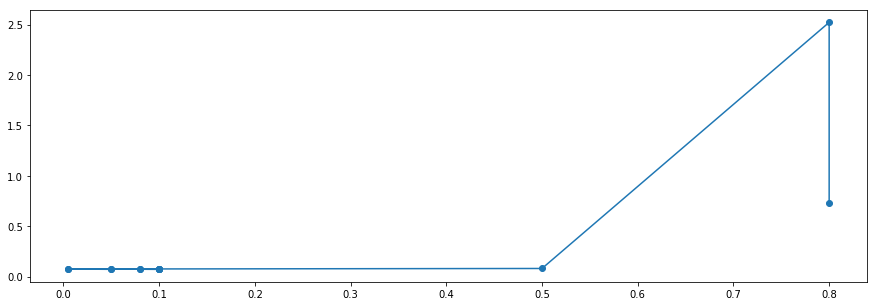

In [387]:
# Errorbar between learn rate and Logloss of GBM for runtime=333
plt.figure(figsize=(15,5))
plt.errorbar(df_gbm1[['learn_rate']],df_gbm1['Logloss'],marker='o')

<ErrorbarContainer object of 3 artists>

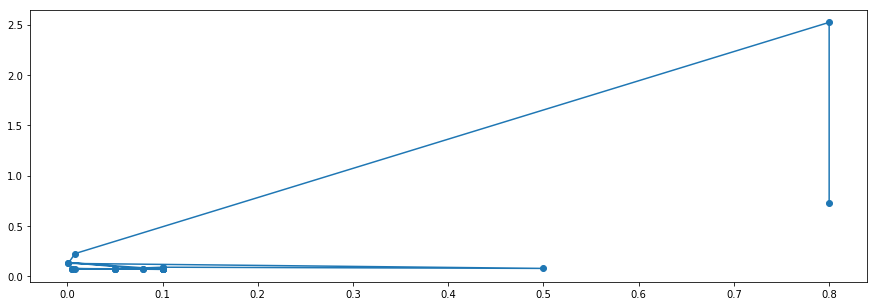

In [388]:
# Errorbar between learn rate and Logloss of GBM for runtime=555
plt.figure(figsize=(15,5))
plt.errorbar(df_gbm2[['learn_rate']],df_gbm2['Logloss'],marker='o')

<ErrorbarContainer object of 3 artists>

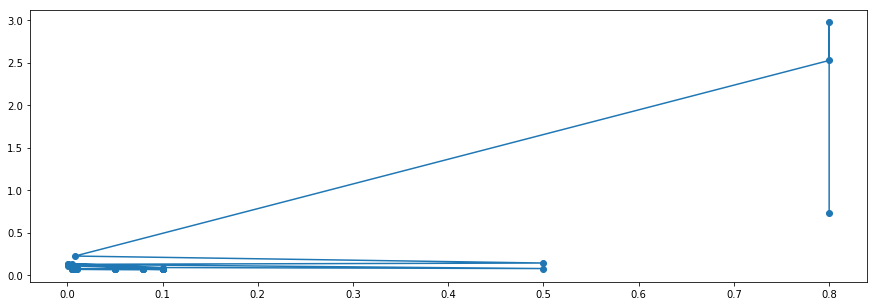

In [389]:
# Errorbar between learn rate and Logloss of GBM for runtime=999
plt.figure(figsize=(15,5))
plt.errorbar(df_gbm3[['learn_rate']],df_gbm3['Logloss'],marker='o')

<ErrorbarContainer object of 3 artists>

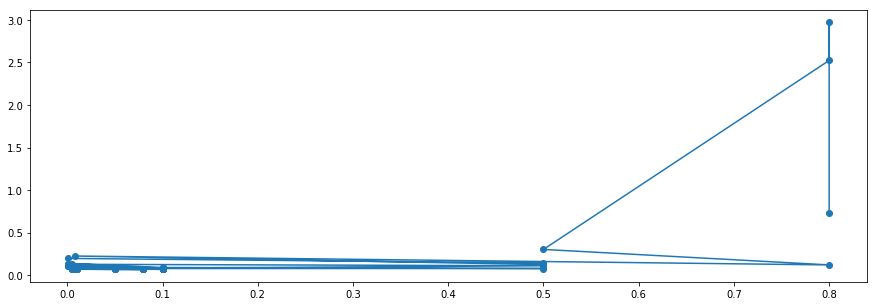

In [390]:
# Errorbar between learn rate and Logloss of GBM for runtime=1333
plt.figure(figsize=(15,5))
plt.errorbar(df_gbm4[['learn_rate']],df_gbm4['Logloss'],marker='o')

<ErrorbarContainer object of 3 artists>

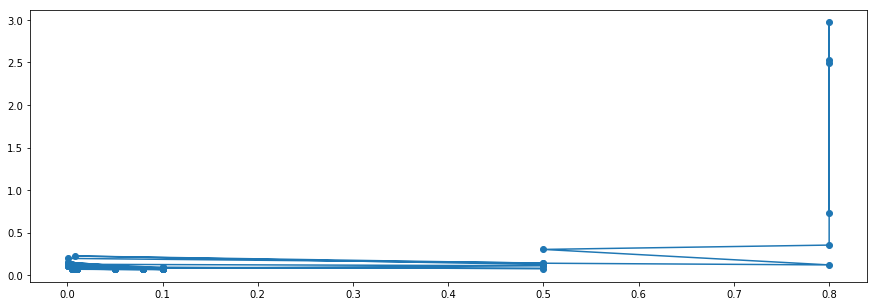

In [391]:
# Errorbar between learn rate and Logloss of GBM for runtime=1555
plt.figure(figsize=(15,5))
plt.errorbar(df_gbm5[['learn_rate']],df_gbm5['Logloss'],marker='o')

<ErrorbarContainer object of 3 artists>

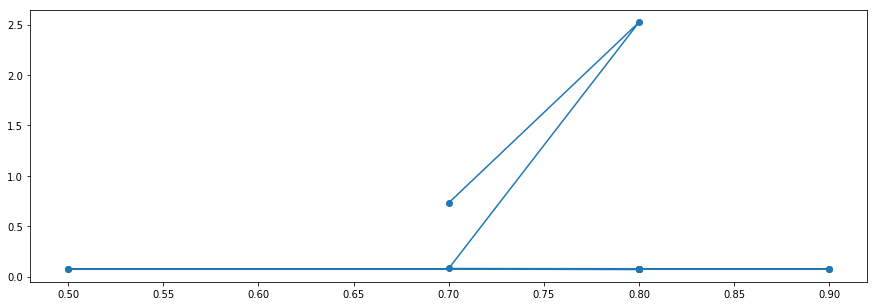

In [392]:
# Errorbar between sample rate and Logloss of GBM for runtime=333
plt.figure(figsize=(15,5))
plt.errorbar(df_gbm1[['sample_rate']],df_gbm1['Logloss'],marker='o')

<ErrorbarContainer object of 3 artists>

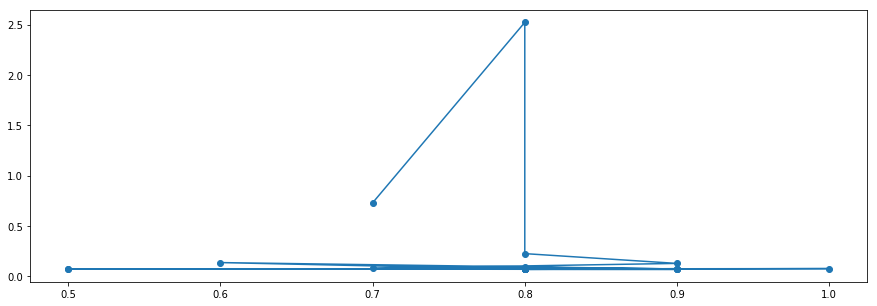

In [393]:
# Errorbar between sample rate and Logloss of GBM for runtime=555
plt.figure(figsize=(15,5))
plt.errorbar(df_gbm2[['sample_rate']],df_gbm2['Logloss'],marker='o')

<ErrorbarContainer object of 3 artists>

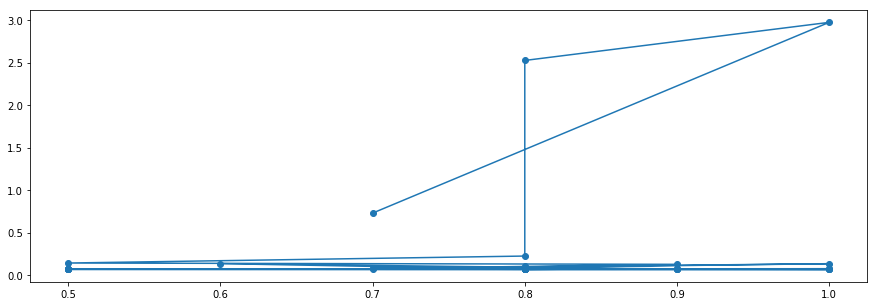

In [394]:
# Errorbar between sample rate and Logloss of GBM for runtime=999
plt.figure(figsize=(15,5))
plt.errorbar(df_gbm3[['sample_rate']],df_gbm3['Logloss'],marker='o')

<ErrorbarContainer object of 3 artists>

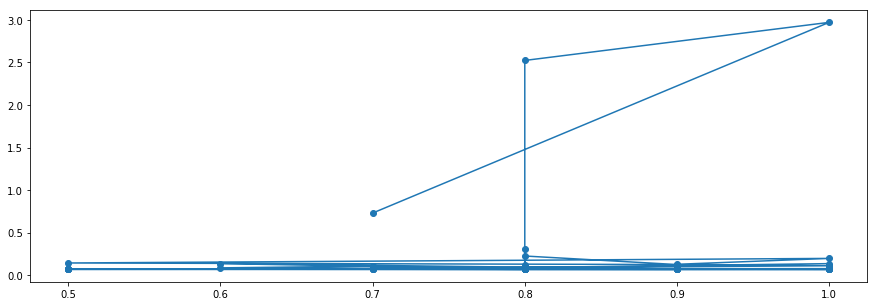

In [395]:
# Errorbar between sample rate and Logloss of GBM for runtime=1333
plt.figure(figsize=(15,5))
plt.errorbar(df_gbm4[['sample_rate']],df_gbm4['Logloss'],marker='o')

<ErrorbarContainer object of 3 artists>

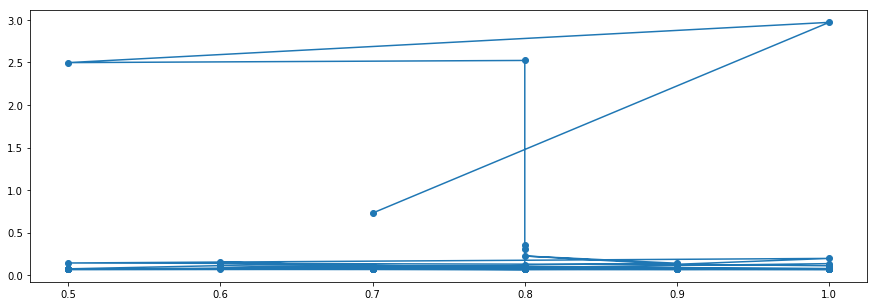

In [396]:
# Errorbar between sample rate and Logloss of GBM for runtime=1555
plt.figure(figsize=(15,5))
plt.errorbar(df_gbm5[['sample_rate']],df_gbm5['Logloss'],marker='o')

In [408]:
df_gbm1['distribution'].loc[(df_gbm1['distribution'] =='bernoulli')] = int(1)
df_gbm11.describe()

,learn_rate,learn_rate_annealing,max_abs_leafnode_pred,pred_noise_bandwidth,tweedie_power,quantile_alpha,huber_alpha,sample_rate,col_sample_rate,nfolds,...,max_after_balance_size,max_runtime_secs,min_rows,min_split_improvement,nbins,nbins_cats,nbins_top_level,seed,stopping_rounds,stopping_tolerance
count,14.000000,14.0,1.400000e+01,14.0,14.0,14.0,1.400000e+01,14.000000,14.000000,0.0,...,14.0,14.0,14.000000,14.000000,14.0,14.0,14.0,1.400000e+01,14.0,1.400000e+01
mean,0.205000,1.0,inf,0.0,1.5,0.5,9.000000e-01,0.757143,0.821429,NaN,...,5.0,0.0,54.357143,0.000055,20.0,1024.0,1024.0,1.209769e+18,0.0,7.474769e-03
std,0.278664,0.0,inf,0.0,0.0,0.0,1.152133e-16,0.122250,0.125137,NaN,...,0.0,0.0,47.503210,0.000047,0.0,0.0,0.0,4.511616e+18,0.0,2.700311e-18
min,0.005000,1.0,1.797693e+308,0.0,1.5,0.5,9.000000e-01,0.500000,0.700000,NaN,...,5.0,0.0,1.000000,0.000010,20.0,1024.0,1024.0,-7.524386e+18,0.0,7.474769e-03
25%,0.057500,1.0,1.797693e+308,0.0,1.5,0.5,9.000000e-01,0.725000,0.700000,NaN,...,5.0,0.0,10.000000,0.000010,20.0,1024.0,1024.0,-1.491295e+18,0.0,7.474769e-03
50%,0.100000,1.0,1.797693e+308,0.0,1.5,0.5,9.000000e-01,0.800000,0.800000,NaN,...,5.0,0.0,57.500000,0.000055,20.0,1024.0,1024.0,2.327584e+18,0.0,7.474769e-03
75%,0.100000,1.0,1.797693e+308,0.0,1.5,0.5,9.000000e-01,0.800000,0.950000,NaN,...,5.0,0.0,100.000000,0.000100,20.0,1024.0,1024.0,4.382329e+18,0.0,7.474769e-03
max,0.800000,1.0,1.797693e+308,0.0,1.5,0.5,9.000000e-01,0.900000,1.000000,NaN,...,5.0,0.0,100.000000,0.000100,20.0,1024.0,1024.0,7.897488e+18,0.0,7.474769e-03


In [ ]:
df_gbm11['categorical_encoding'].loc[(df_gbm11['categorical_encoding'] =='AUTO')] = int(2)
df_gbm11['histogram_type'].loc[(df_gbm11['histogram_type'] =='AUTO')] = int(1)

# Stepwise Regression for finding important parameters:

In [ ]:
df=df_gbm11.drop(['Logloss','Model_name','Leaderboard_rank','max_abs_leafnode_pred','nfolds','class_sampling_factors'],axis=1)
y = df_gbm11['Logloss']

X = pd.DataFrame(data=df, columns=df.columns.values)

def stepwise_selection(X, y,
                     initial_list=[],
                     threshold_in=0.01,
                     threshold_out = 0.05,
                     verbose=True):

  included = list(initial_list)
  while True:
      changed=False
      # forward step
      excluded = list(set(X.columns)-set(included))
      new_pval = pd.Series(index=excluded)
      r2= pd.Series(index=excluded)

      for new_column in excluded:
          model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]])).astype(float)).fit()
          new_pval[new_column] = model.pvalues[new_column]
          #r2[new_column] = model.rsquared[new_column]
      best_pval = new_pval.min()
      if best_pval < threshold_in:
          best_feature = new_pval.argmin()
          included.append(best_feature)
          changed=True
          if verbose:
              print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
  return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

Add  huber_alpha                    with p-value 0.00230766
Add  nbins                          with p-value 0.00230766
Add  quantile_alpha                 with p-value 0.00230766
Add  max_after_balance_size         with p-value 0.00230766
Add  tweedie_power                  with p-value 0.00230766
Add  nbins_top_level                with p-value 0.00230766
Add  nbins_cats                     with p-value 0.00230766
Add  histogram_type                 with p-value 0.00230766
Add  categorical_encoding           with p-value 0.00230766
Add  learn_rate_annealing           with p-value 0.00230766
Add  col_sample_rate_change_per_level with p-value 0.00230766
Add  stopping_tolerance             with p-value 0.00230766
Add  learn_rate                     with p-value 0.00494899


# Conclusion:

- In this work, we successfully generated and saved H2O AutoMl leaderboard for five runtimes- 333,555,999,1333,1555 
- All the metadata generated has been saved in json format.
- Stacked Ensembles in H2O AutoML automatically gets trained on collection of individual models to produce highly predictive ensemble models.
- The "All Models" ensemble is an ensemble of all of the individual models in the AutoML run.
- Some of the hyperparameter's value remains fixed for all runtime.
- Stepwise Regression produced important hyperparameters for glm as follows:
    - huber_alpha                 
    - nbins  
    - quantile_alpha                 
    - max_after_balance_size         
    - tweedie_power                  
    - nbins_top_level                
    - nbins_cats                     
    - histogram_type                 
    - categorical_encoding           
    - learn_rate_annealing           
    - col_sample_rate_change_per_level 
    - stopping_tolerance             
    - learn_rate                     
- In our analysis, we have not included deep learning algorithms.

# Limitation:

- Stepwise Regression for assessing the important hyperparameters uses Linear Regression OLS Algorithm. However, we do not know the relation between different hyperparameters and logloss. It may be linear or non-linear. 

# Scope of Improvement:

 - To get a better insight into the relationship between hyperparameter settings and performance and to quantify the importance of both single hyperparameters and of interactions between hyperparameters, a better approach can be **Functional ANOVA framework**.

# Contributions
 - Analyzed already provided code: 30%
 - Code written by Tripti: 35%
 - Code written by Ashish: 35%

# Citations:
 - https://github.com/nikbearbrown/INFO_6105/blob/master/Projects-Portolios/NBA%20MVP%20Prediction%20with%20Principal%20Component%20Analysis/Project/Protfolio%20Blog.ipynb
 - https://github.com/prabhuSub/Hyperparamter-Samples
 - http://docs.h2o.ai/h2o/latest-stable/h2o-docs/index.html
 - https://www.kaggle.com/dansbecker/how-models-work

# License
Copyright 2019 TRIPTI SANTANI, ASHISH KUMAR

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.